In [1]:
import os
import pandas as pd
import configparser
import operator
import matplotlib.pyplot as plt
import datetime
import  platform
from collections import defaultdict

In [2]:
system = platform.system()
sep_str  =  "/" if system.lower() == "linux" else "\\"

In [14]:
res_dir_list = [
                #"eval-diff-industry-1month0",
                #"eval-diff-industry-1month1",
                "eval-diff-indus-5day",
                "eval-diff-indus-10day",
                "eval-diff-indus-30day",
                #"eval-diff-industry-50day"
                ]

In [4]:
stra_list = ['term_structure', 'value', 'open_interest', 'currency',
             'liquidity', 'momentum', 'volatility', 'skewness',
             'term_structure2', 'inflation', 'hedging_pressure']

In [17]:
res_pic_dir  = ".." + sep_str +"res_pic"
if not os.path.exists(res_pic_dir):
    os.mkdir(res_pic_dir)

In [6]:
def list_to_type(alist):
    alist = eval(alist)
    #print(isinstance(alist, list))
    #print( operator.eq(alist, ['ss', 'al', 'cu', 'pb', 'wr', 'zn', 'ni', 'hc', 'au', 'ag', 'sn']) )
    if operator.eq(alist, ['ss', 'al', 'cu', 'pb', 'wr', 'zn', 'ni', 'hc', 'au', 'ag', 'sn']):
        return "metal"
    elif operator.eq(alist, ['ru', 'sc', 'tc', 'zc', 'l', 'ta', 'pp', 'bu', 'ma', 'fu', 'me', 'eg', 'sp', 'nr', 'eb', 'ur']):
        return "prod&energy"
    elif operator.eq(alist, ['sr', 'c', 'cf', 'jd', 'cs', 'lr', 'wh', 'jr', 'pm', 'ap', 'cy', 'wt', 'er', 'cj', 'ri', 'ws', 'gn', 'rr']):
        return "grain"
    elif operator.eq(alist, ['i', 'jm', 'j', 'sm', 'sf']):
        return "black_material"
    elif operator.eq(alist, ['a', 'b', 'y', 'm', 'oi', 'p', 'rm', 'rs', 'ro']):
        return "oils&oilseeds"
    elif operator.eq(alist, ['fg', 'rb', 'fb', 'bb', 'v']):
        return "building_material"
    elif operator.eq(alist, ['t', 'ts', 'ih', 'if', 'tf', 'ic']):
        return "finan"
    else:
        return  "future_pool_" + str(len(alist))

current stra  term_structure ..\res_pic\term_structure
current stra  value ..\res_pic\value
current stra  open_interest ..\res_pic\open_interest


c:\users\ultralpha\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


current stra  currency ..\res_pic\currency
current stra  liquidity ..\res_pic\liquidity
current stra  momentum ..\res_pic\momentum
current stra  volatility ..\res_pic\volatility
current stra  skewness ..\res_pic\skewness
current stra  term_structure2 ..\res_pic\term_structure2
current stra  inflation ..\res_pic\inflation
current stra  hedging_pressure ..\res_pic\hedging_pressure


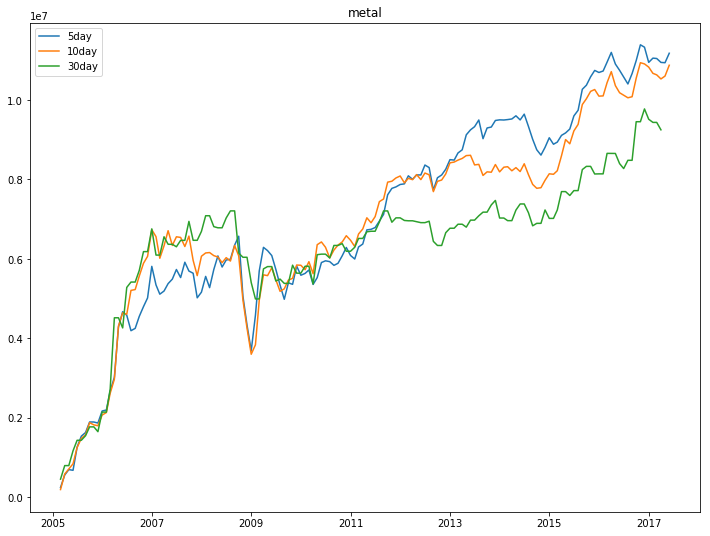

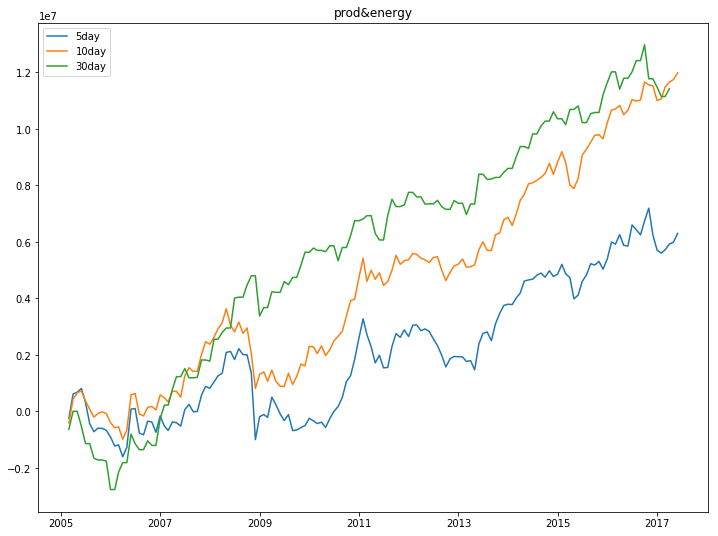

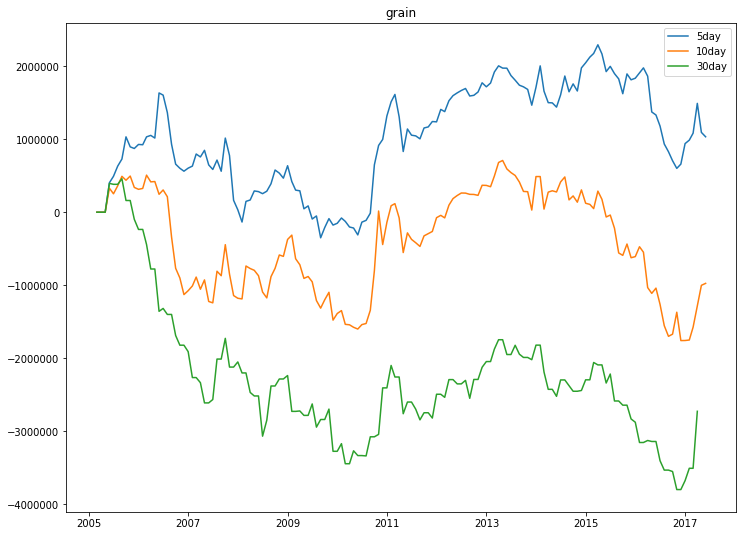

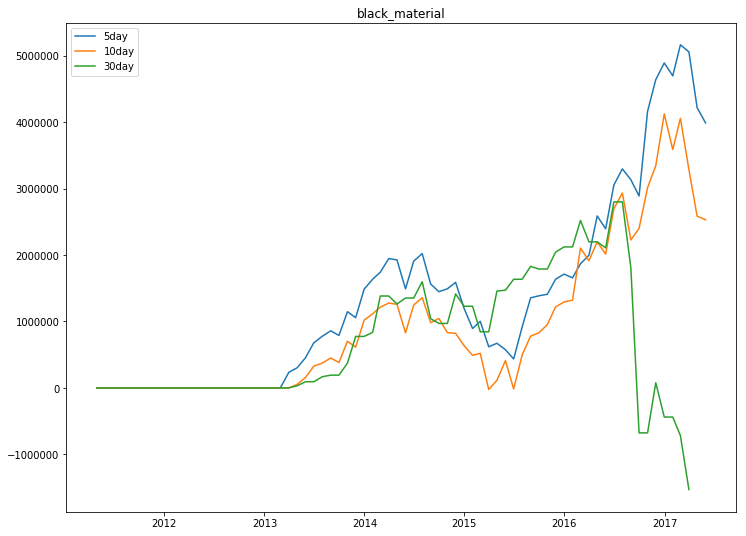

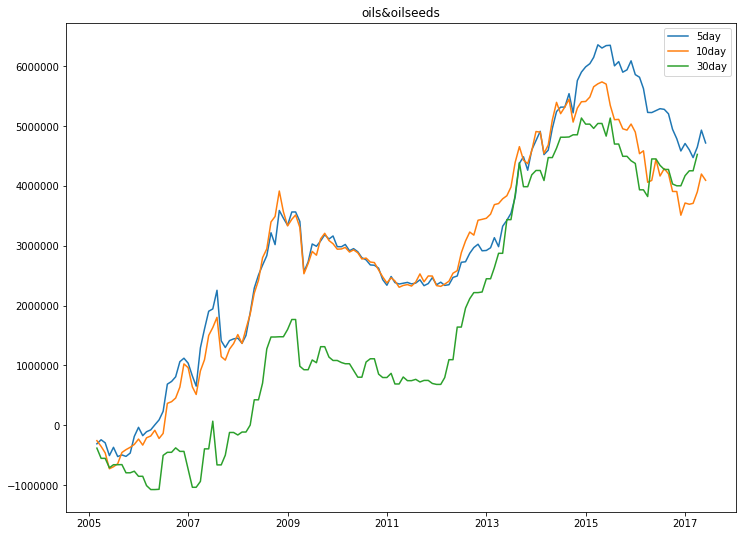

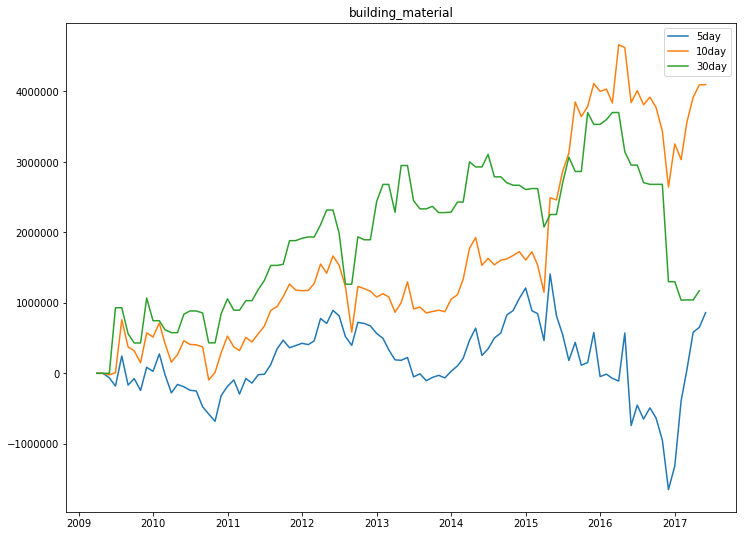

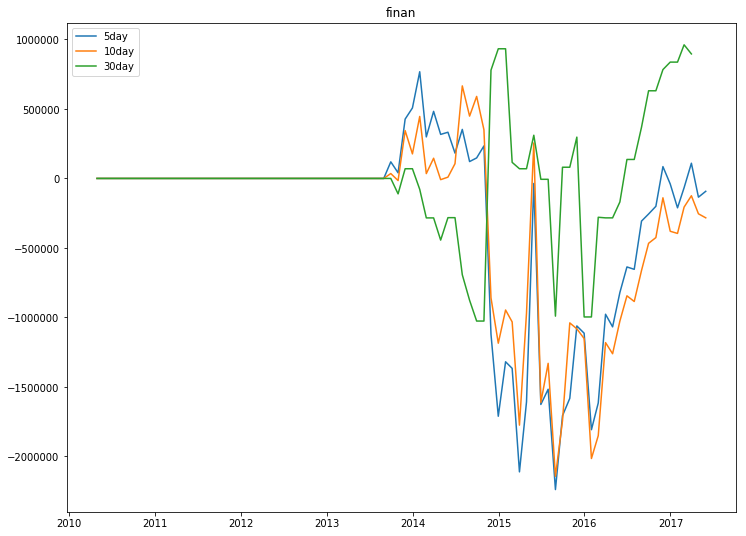

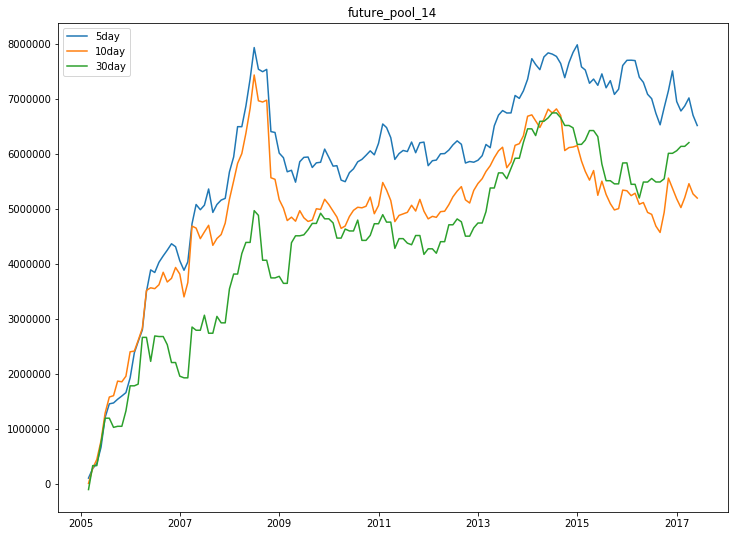

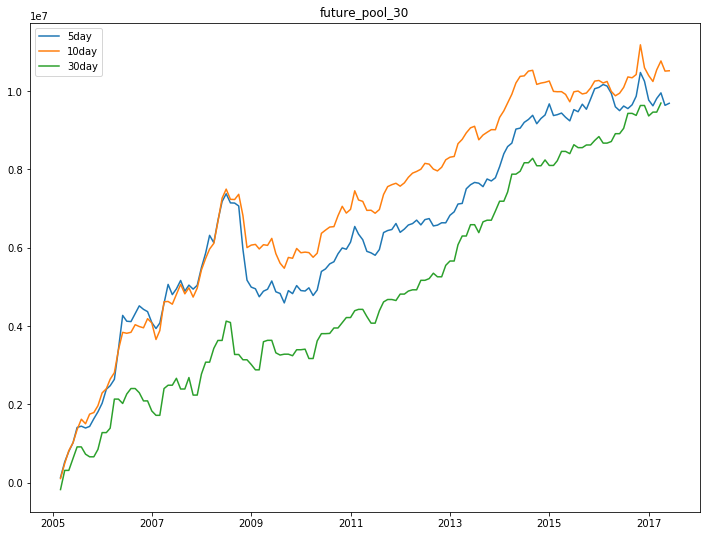

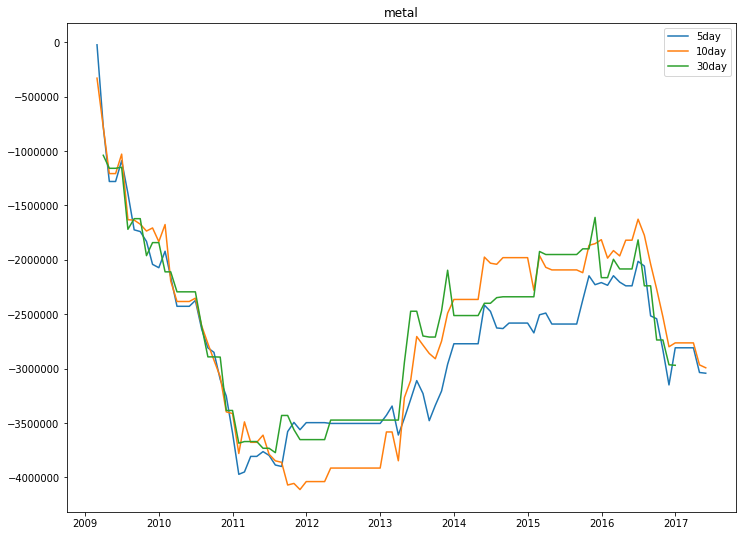

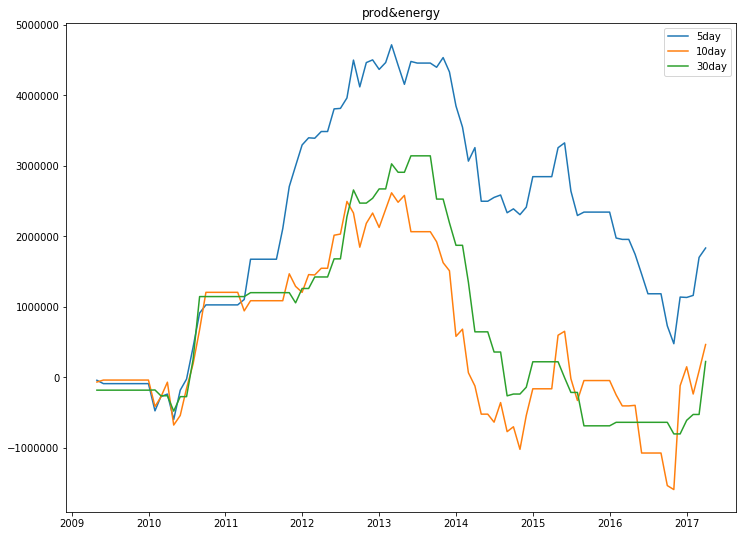

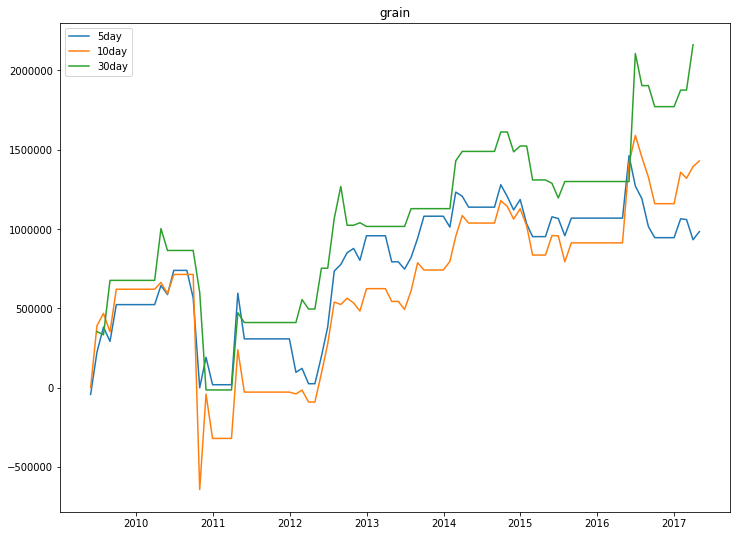

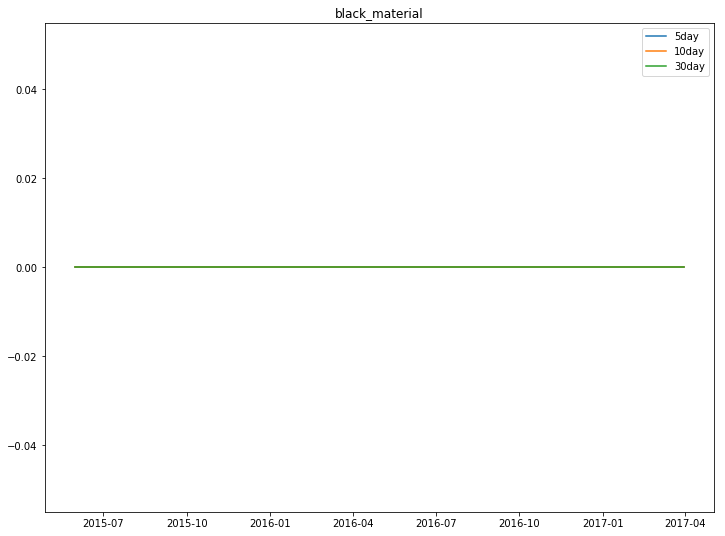

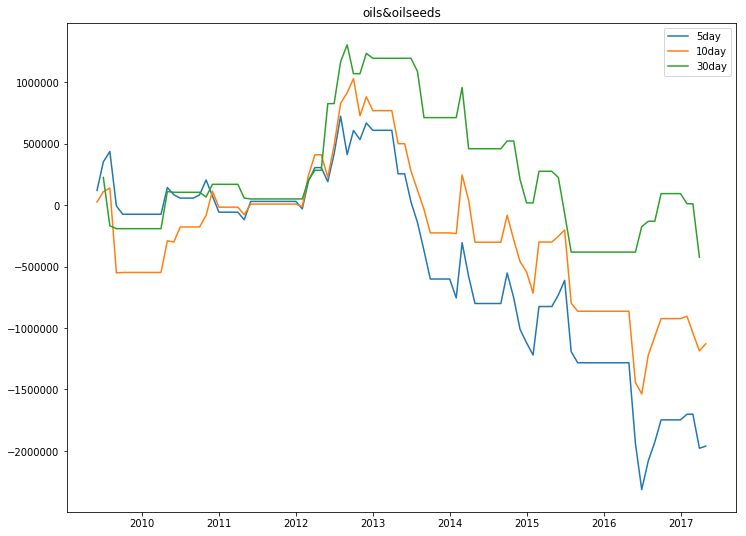

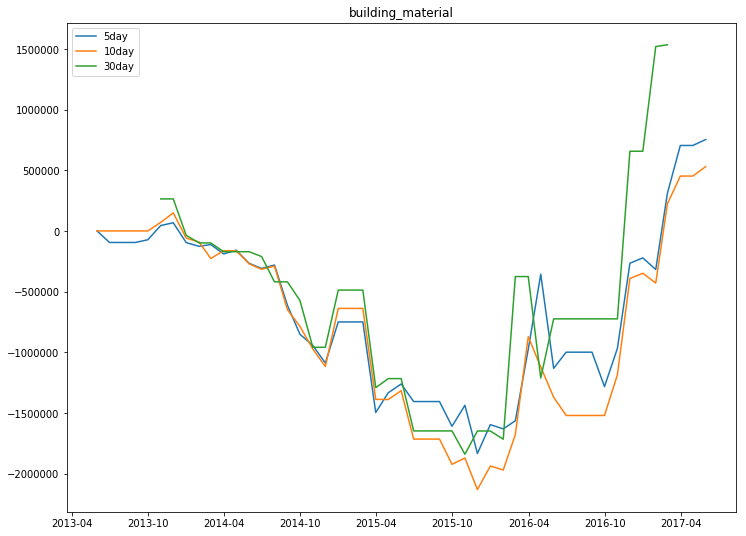

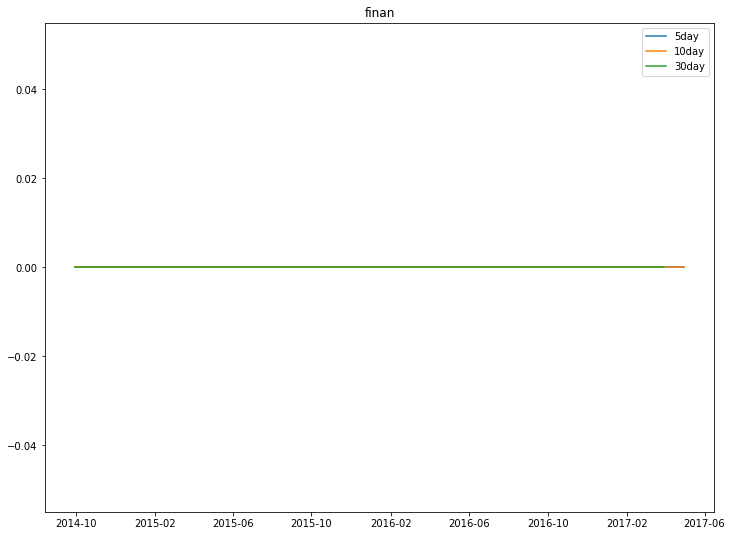

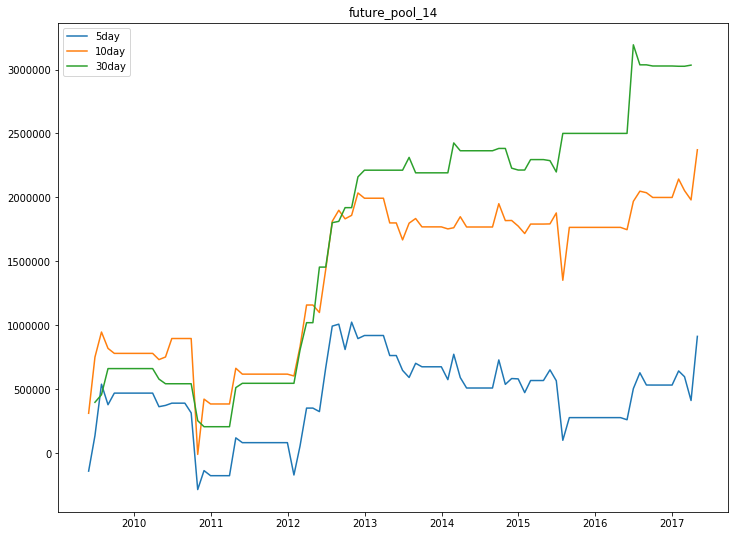

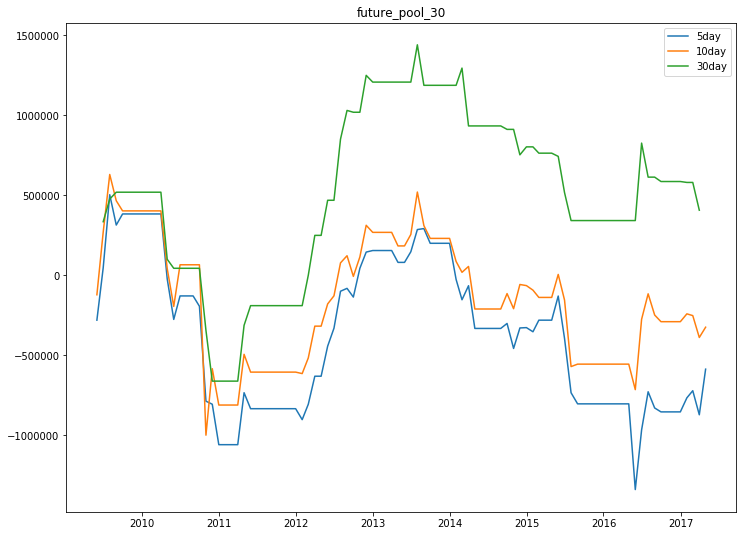

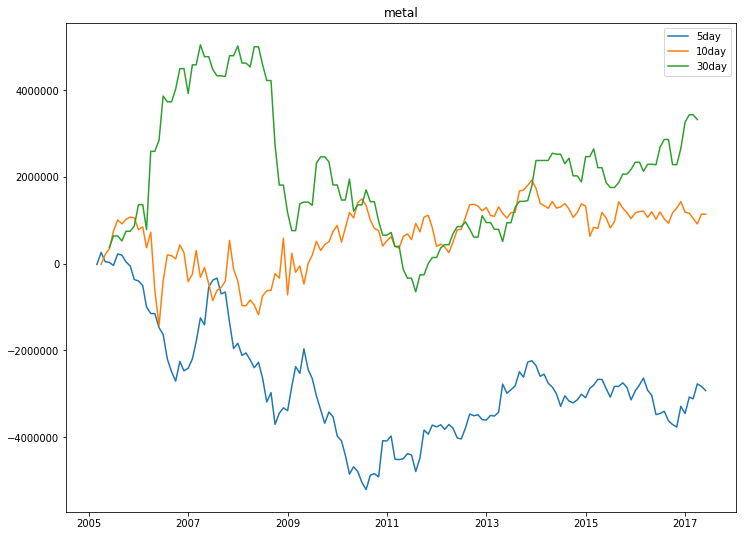

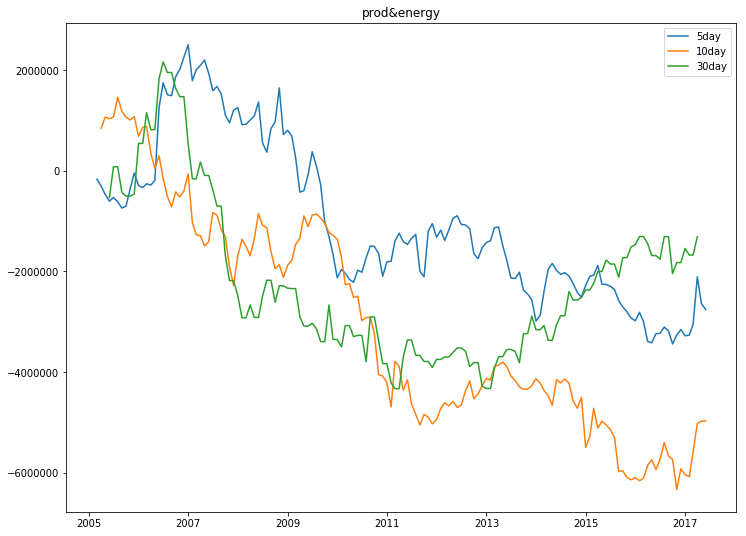

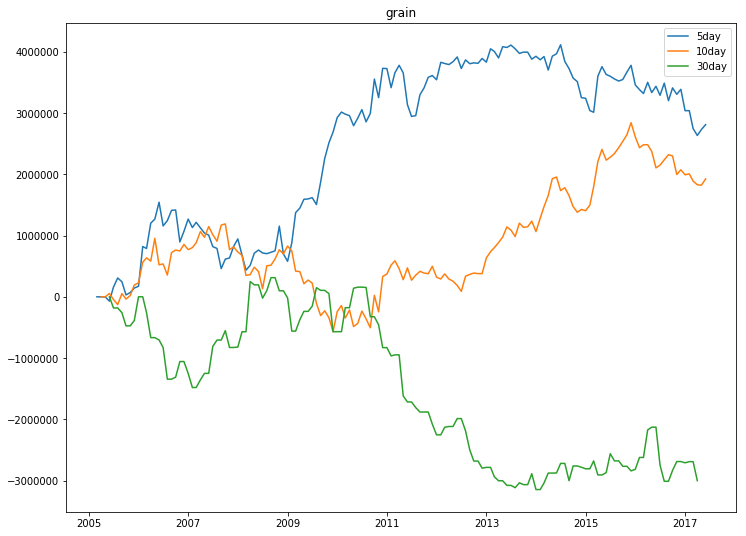

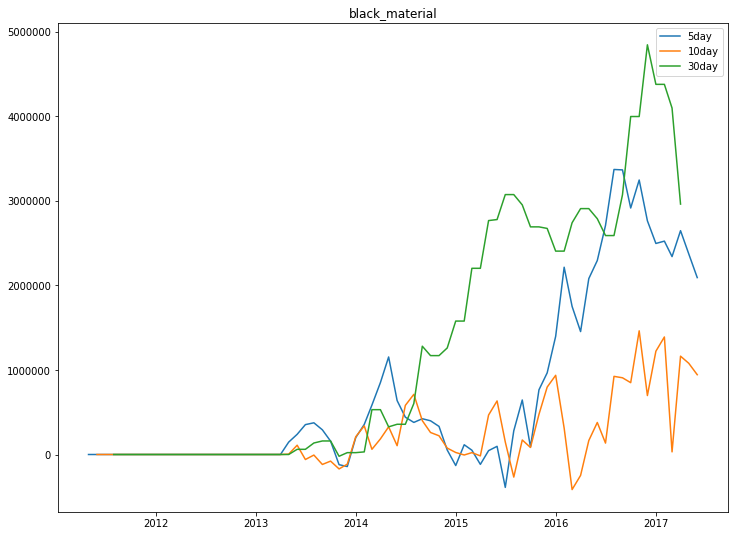

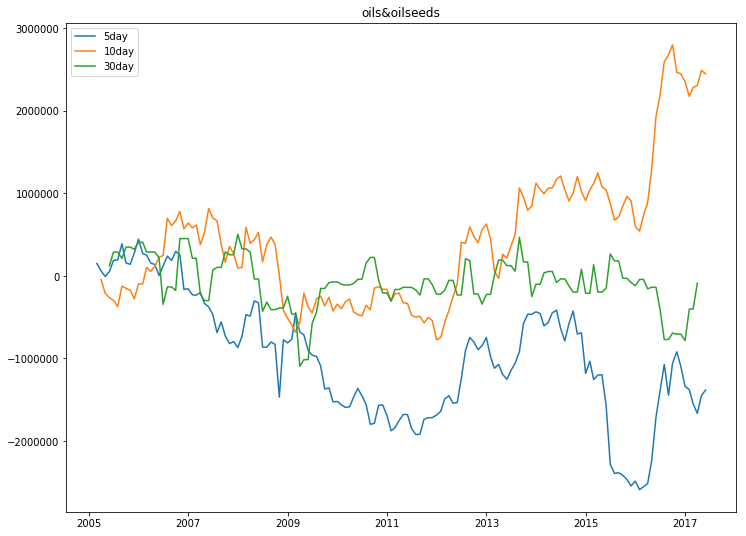

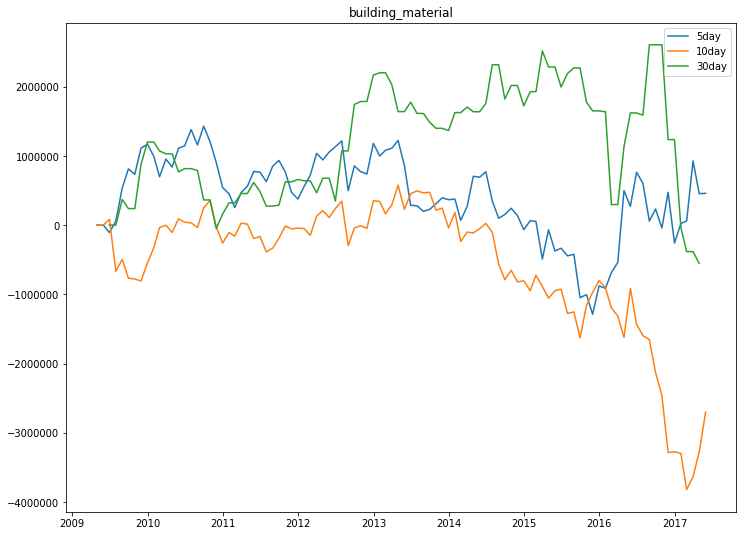

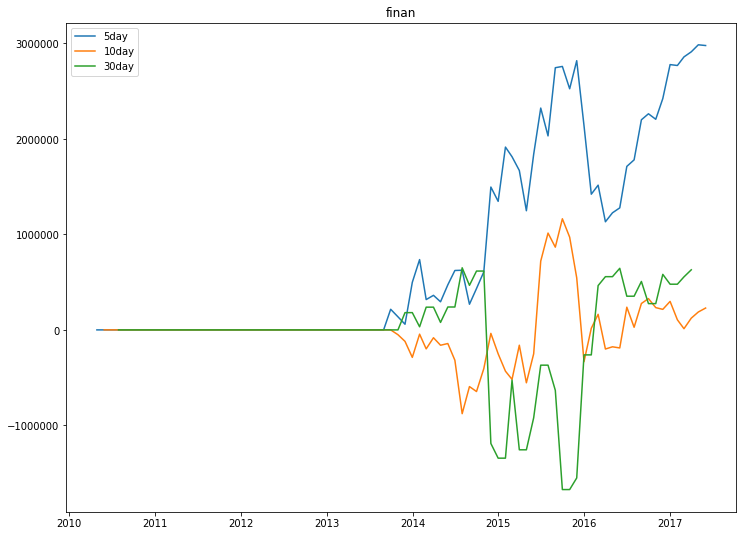

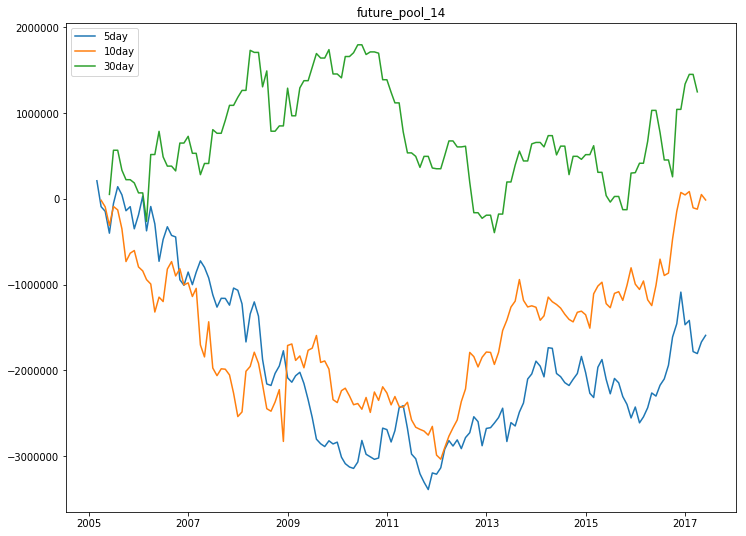

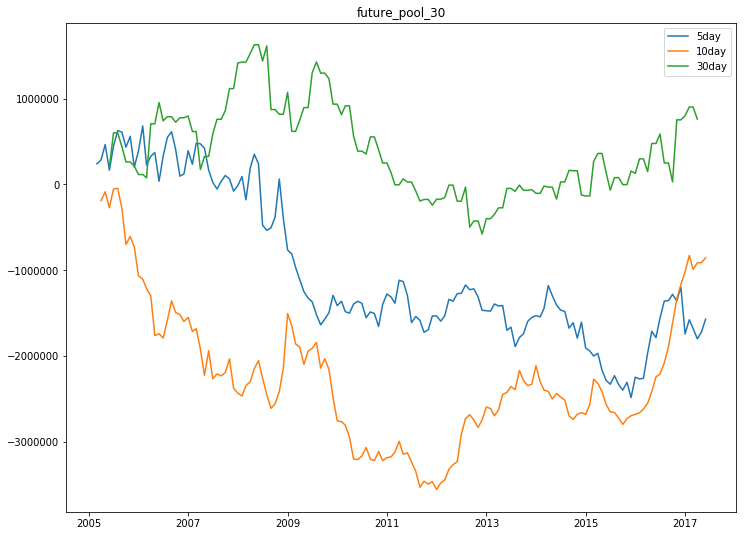

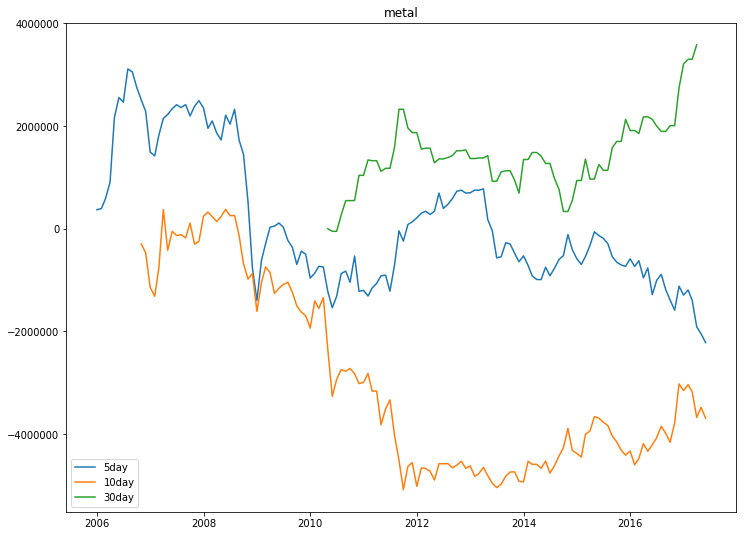

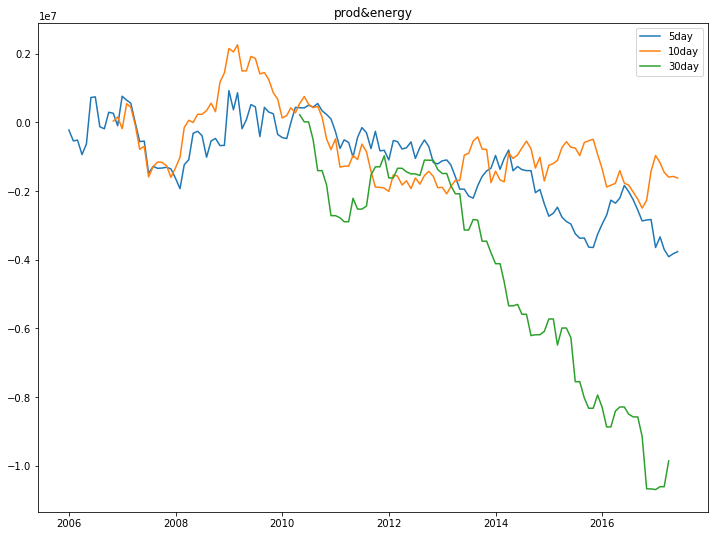

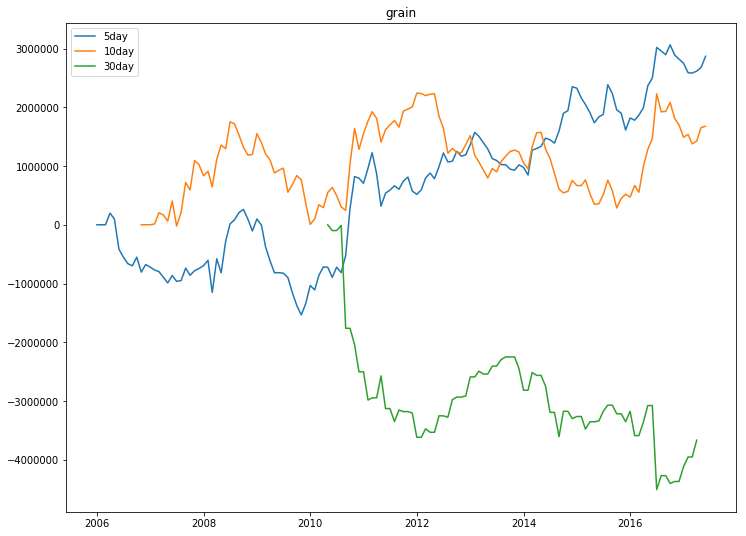

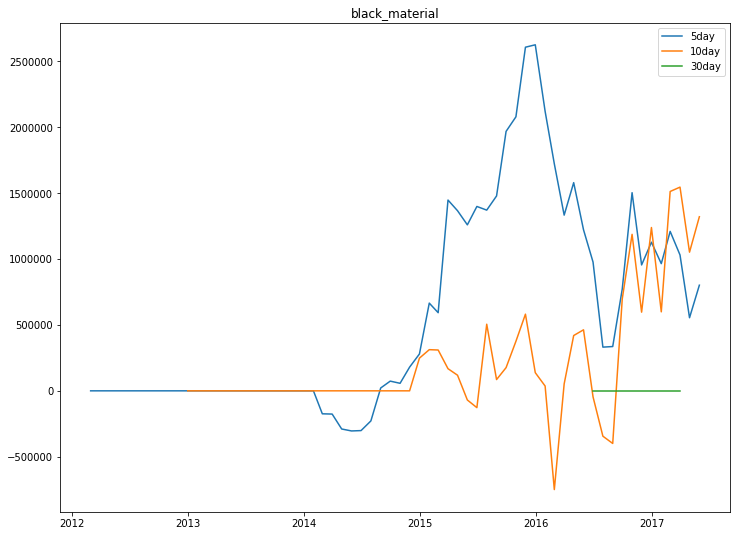

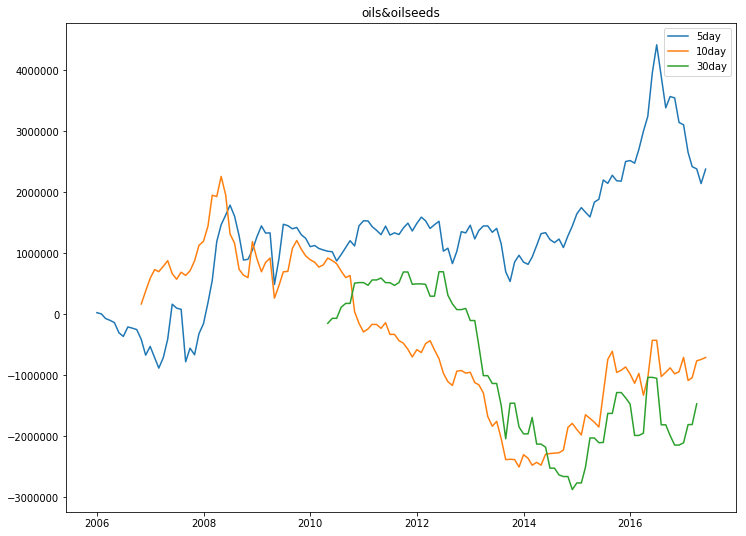

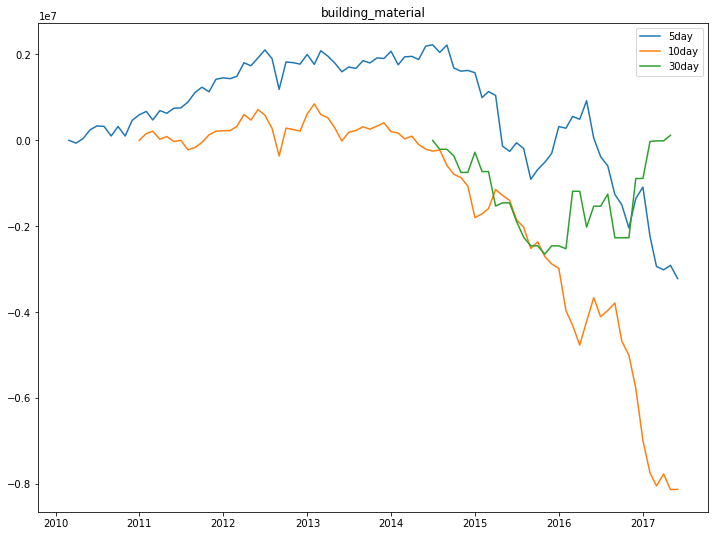

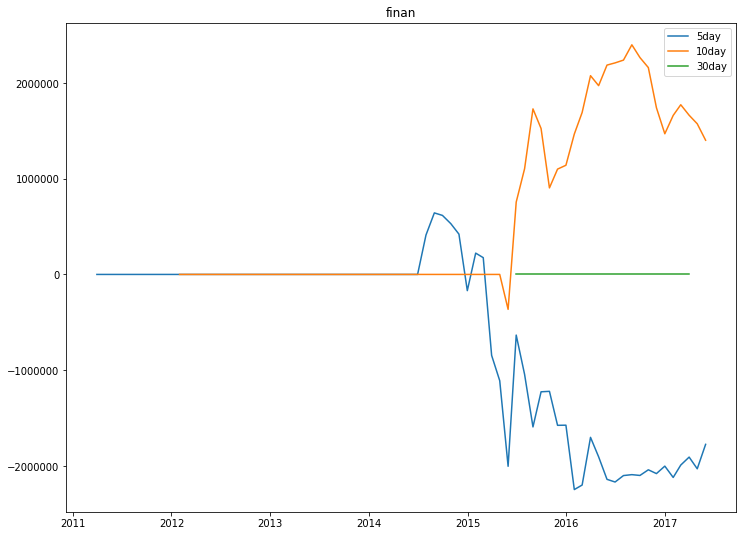

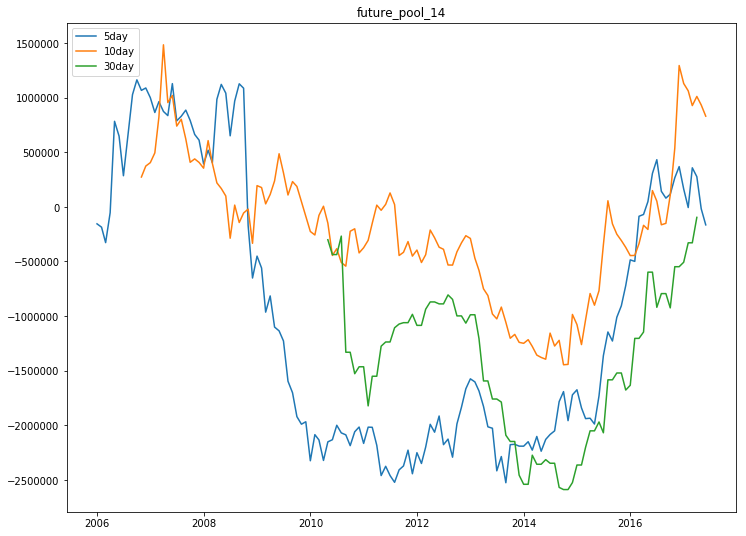

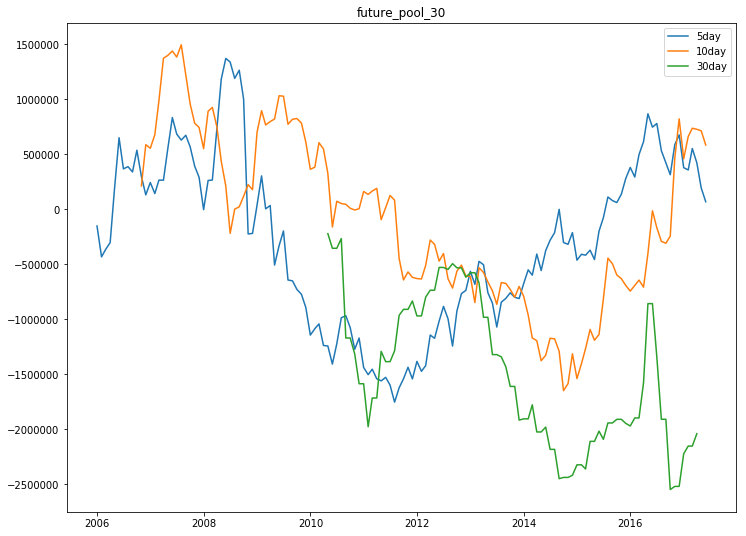

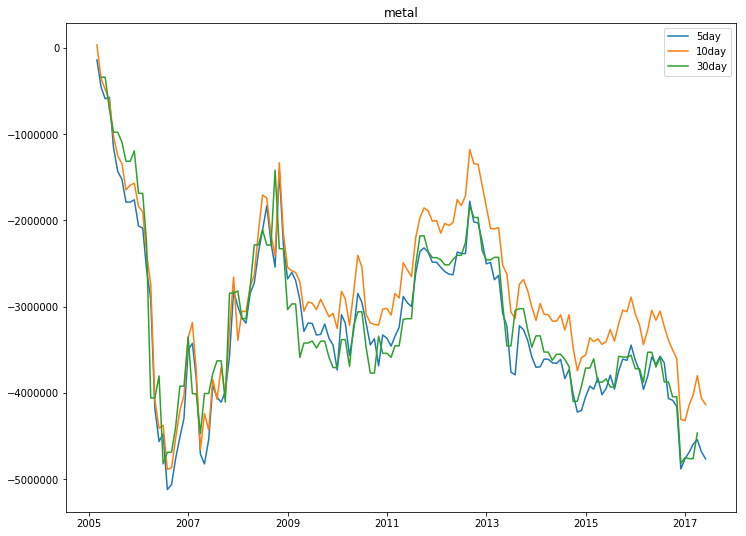

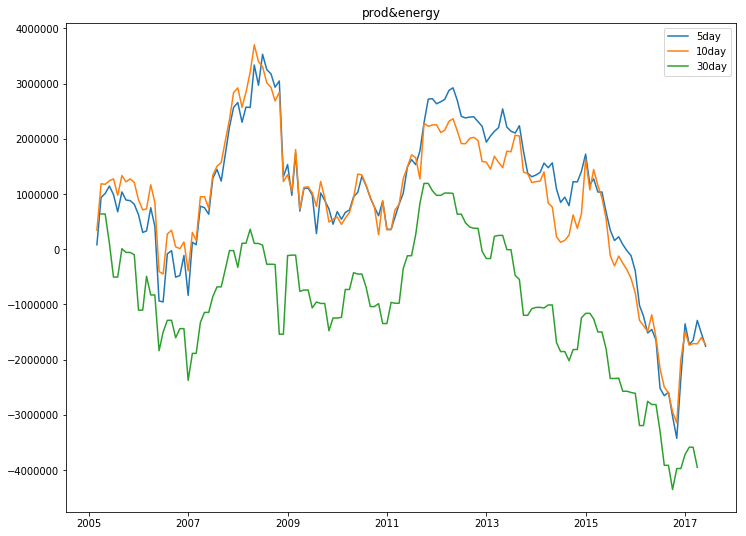

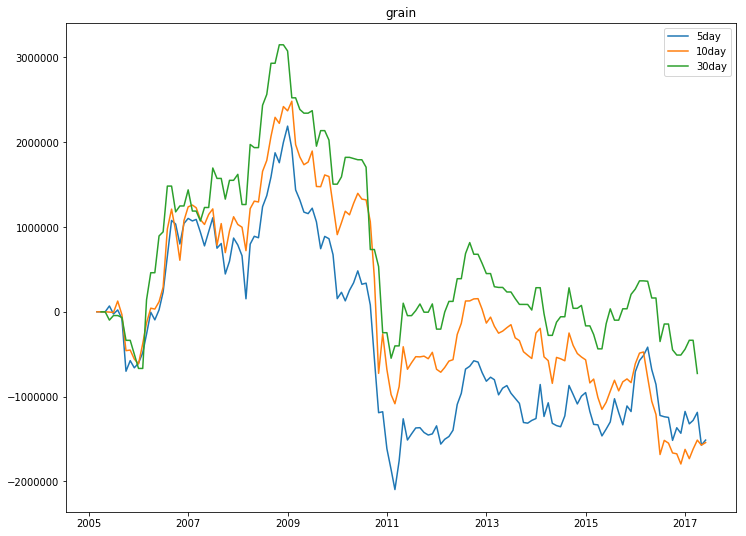

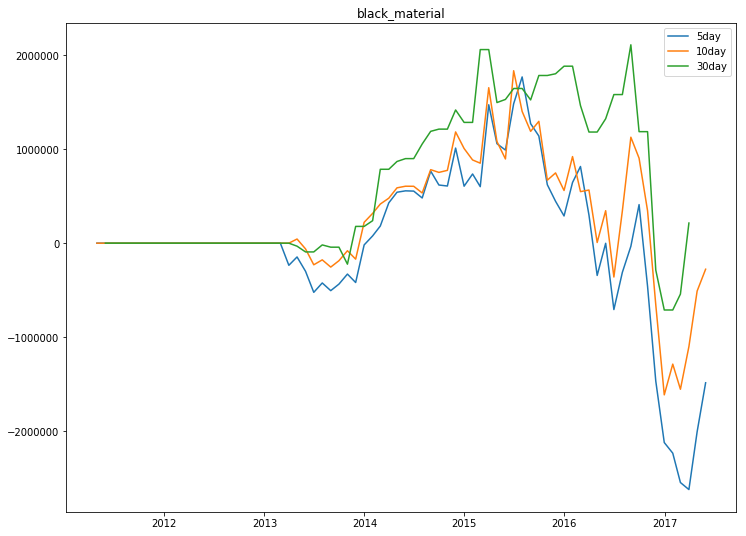

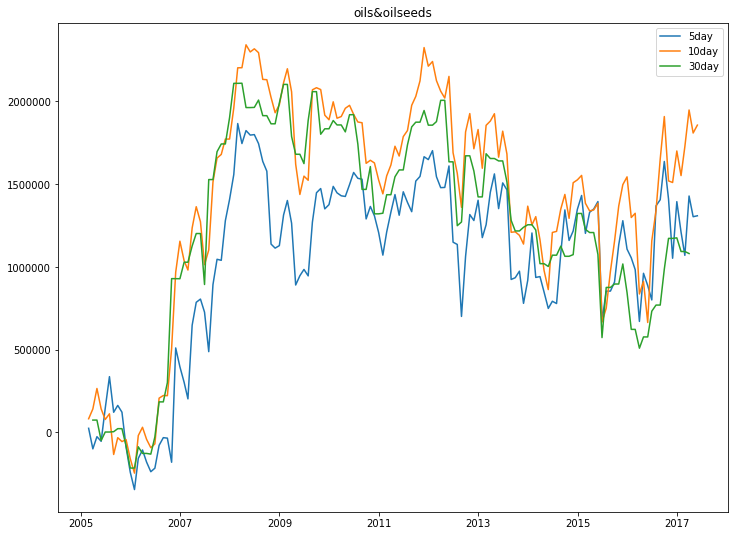

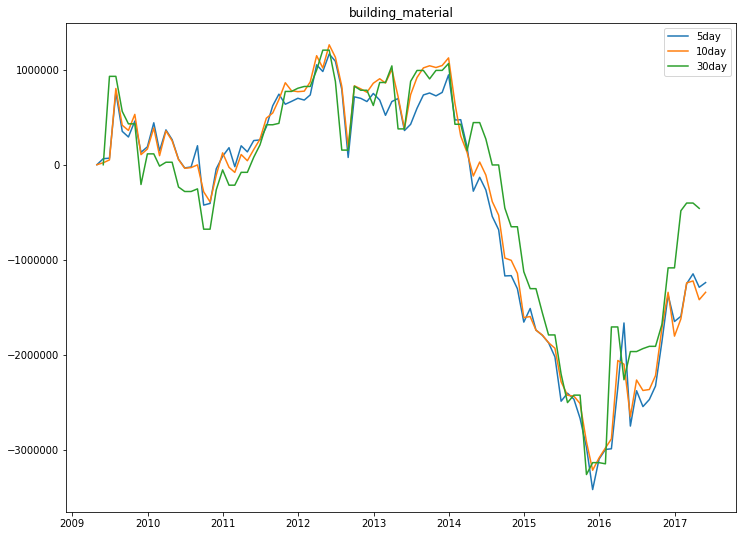

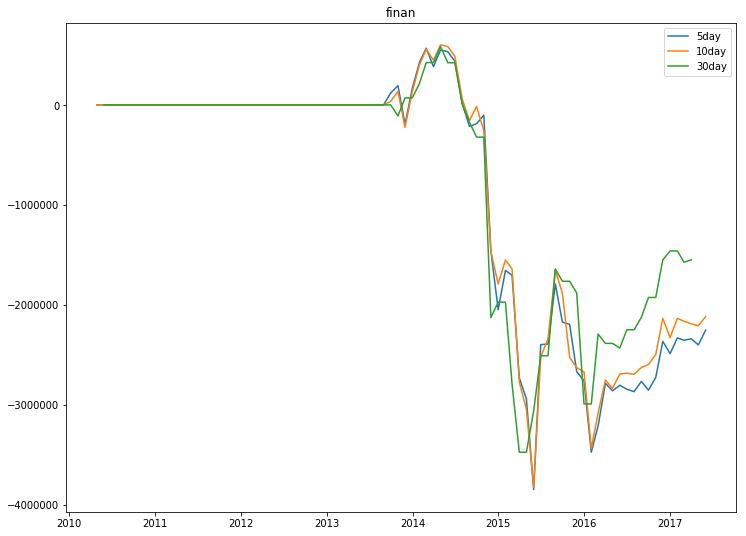

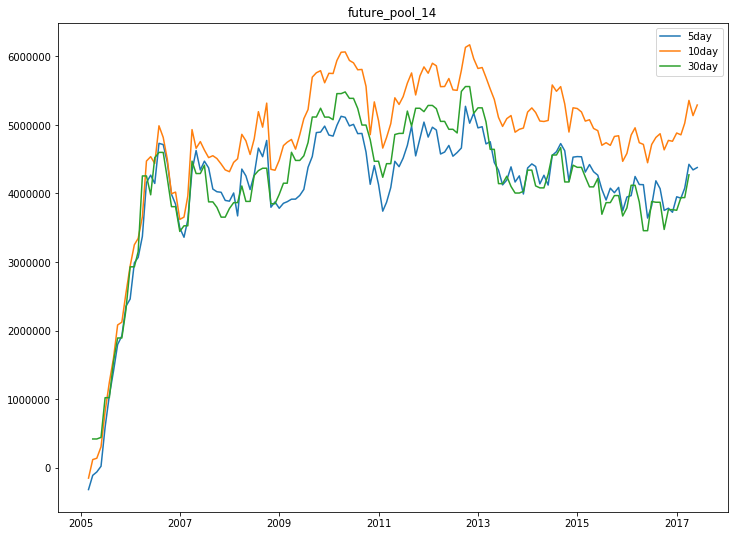

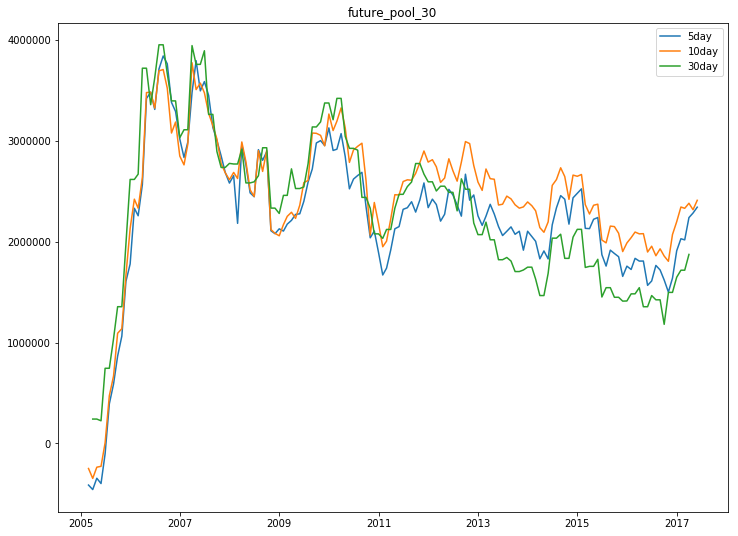

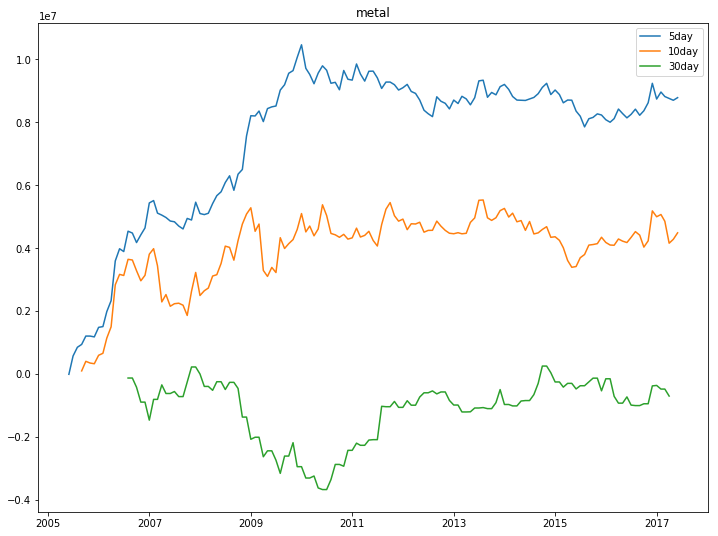

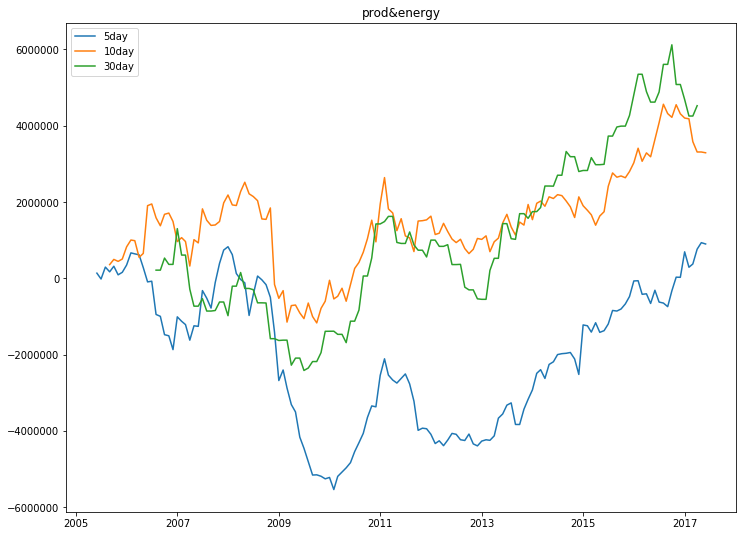

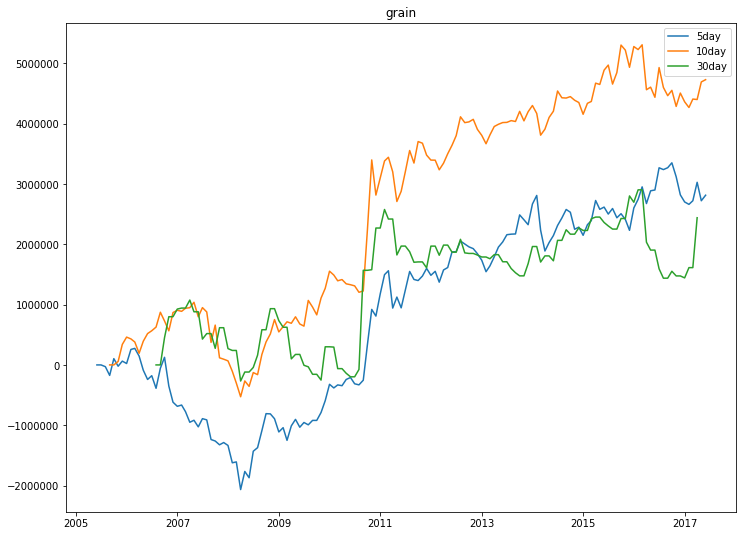

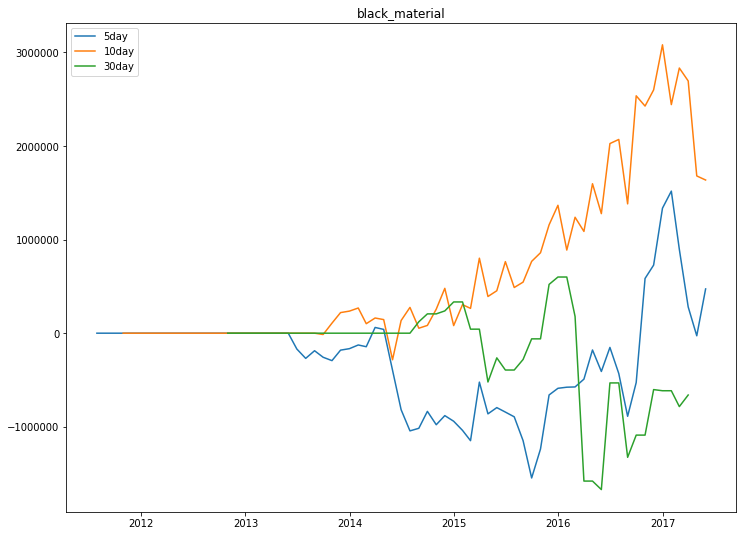

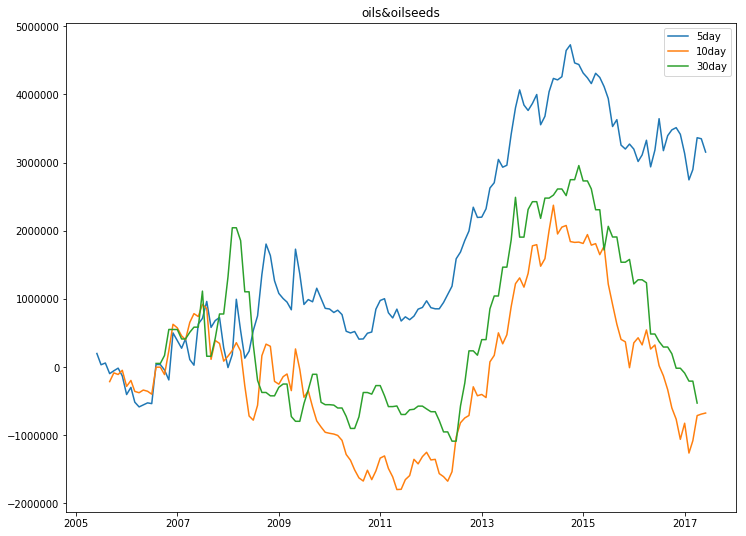

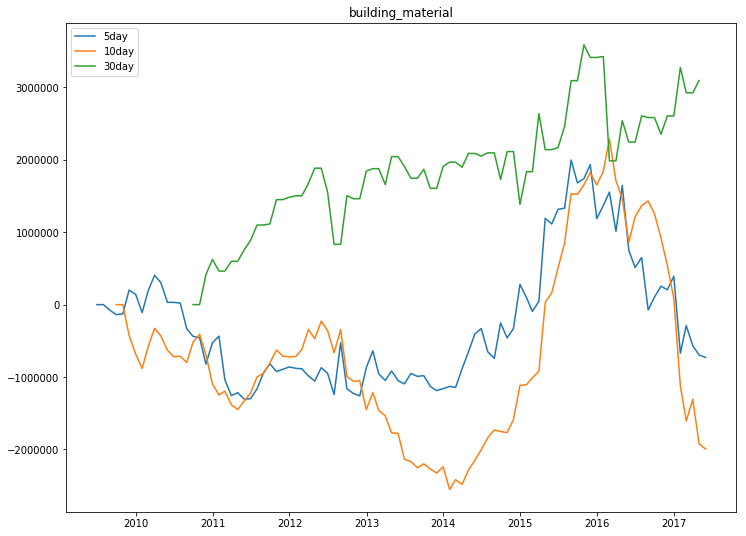

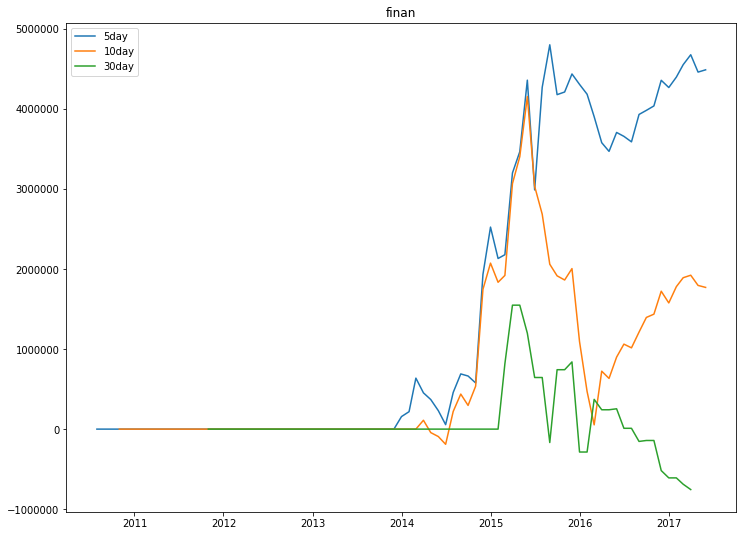

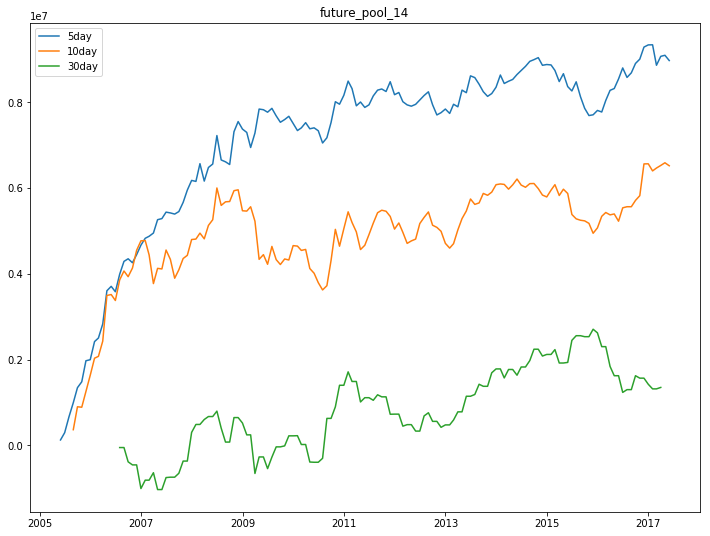

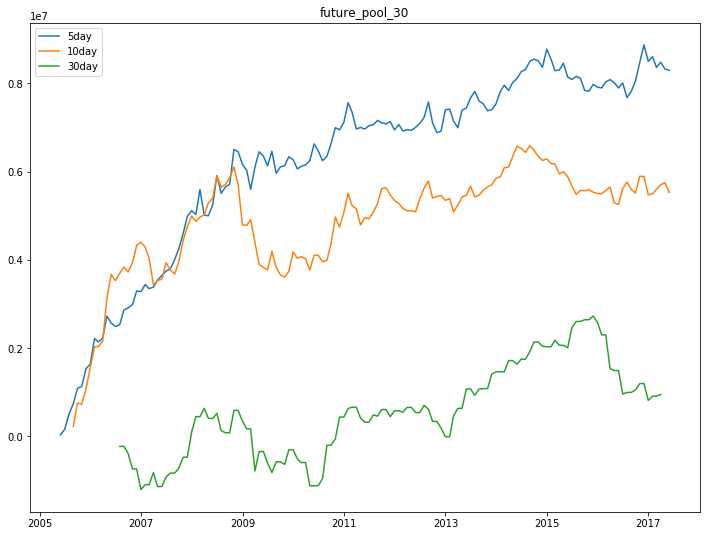

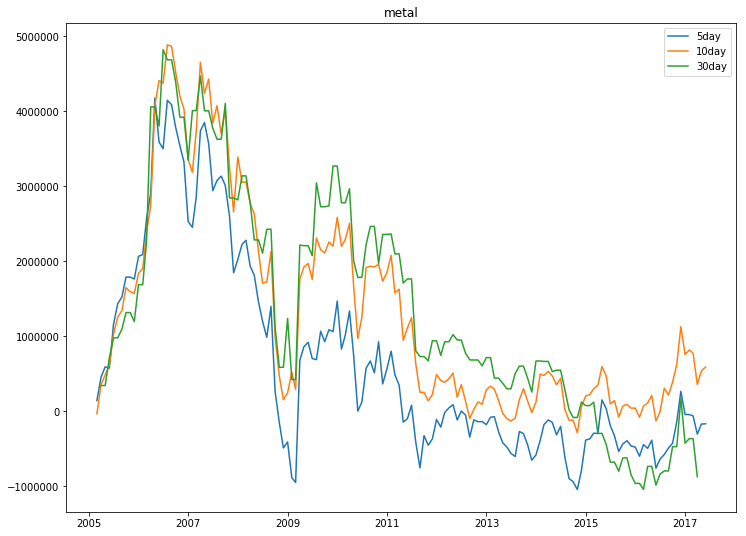

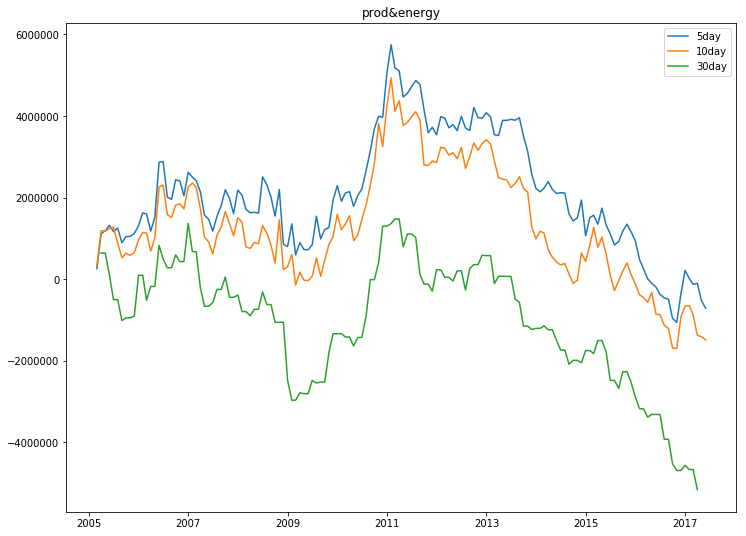

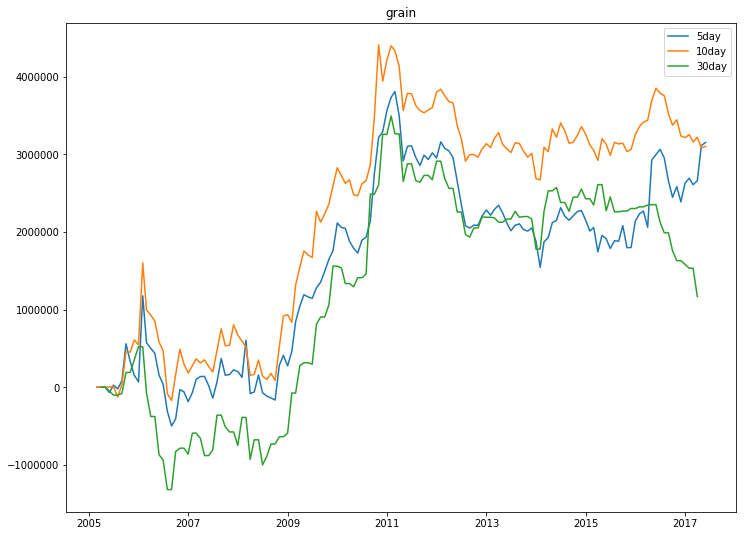

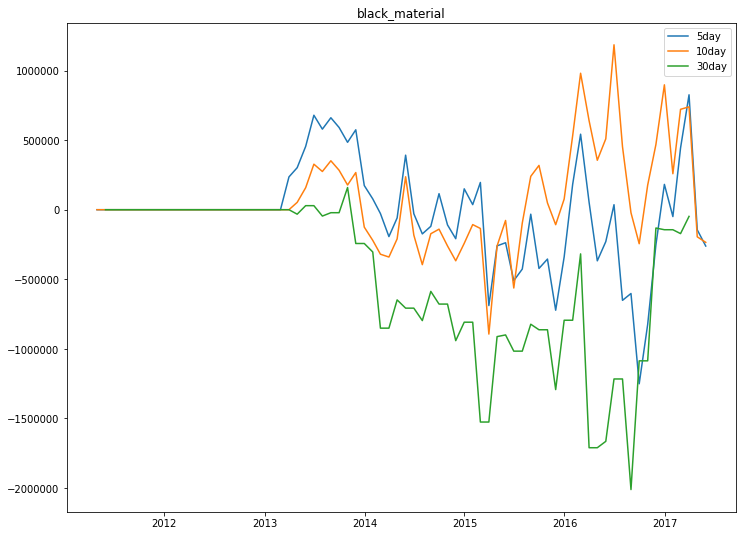

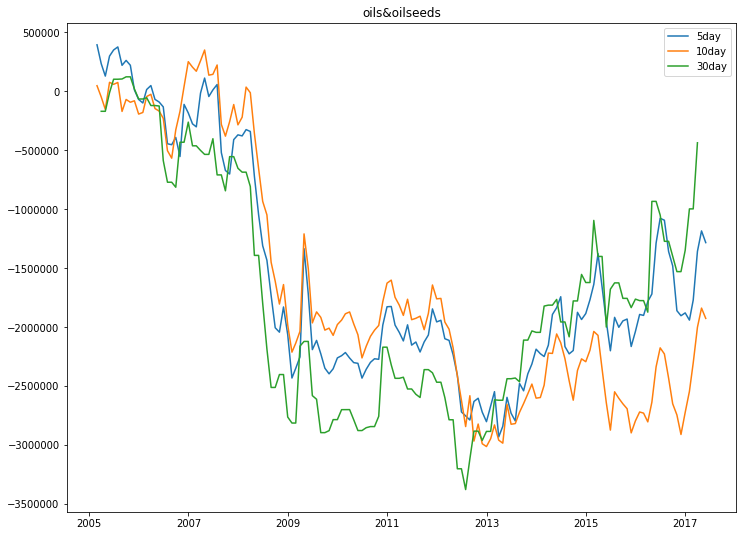

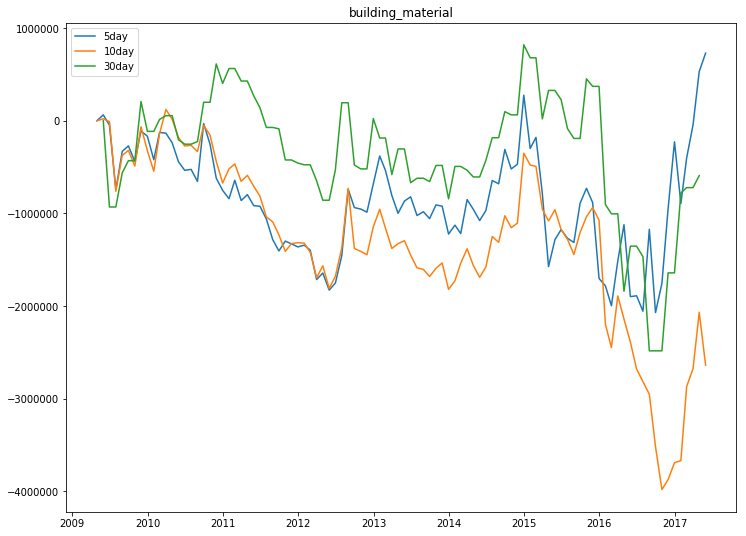

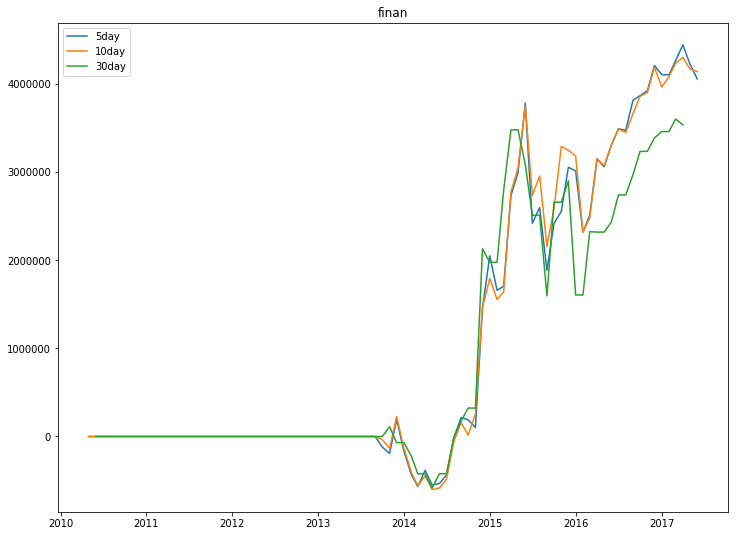

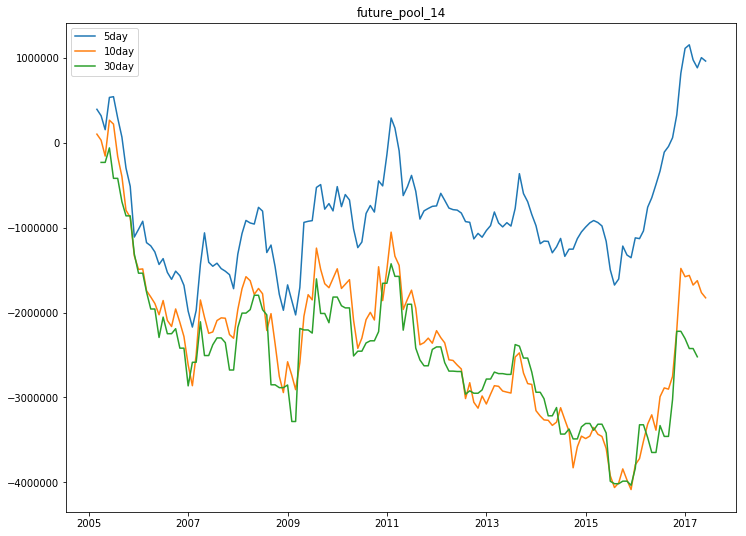

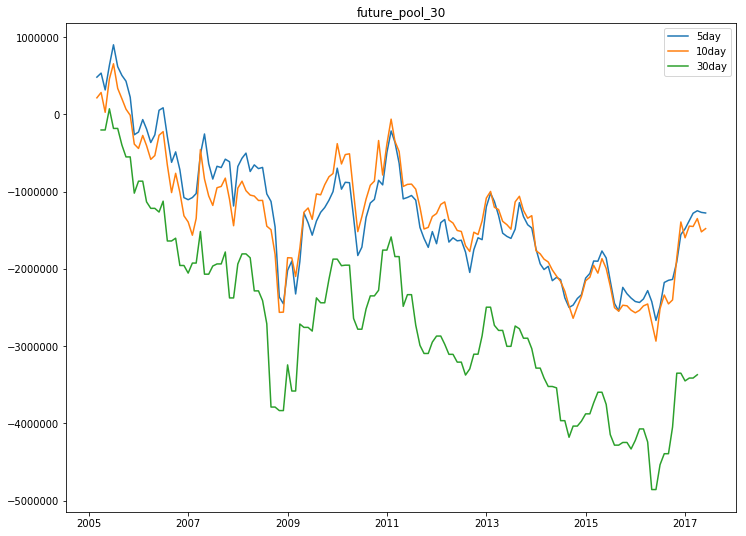

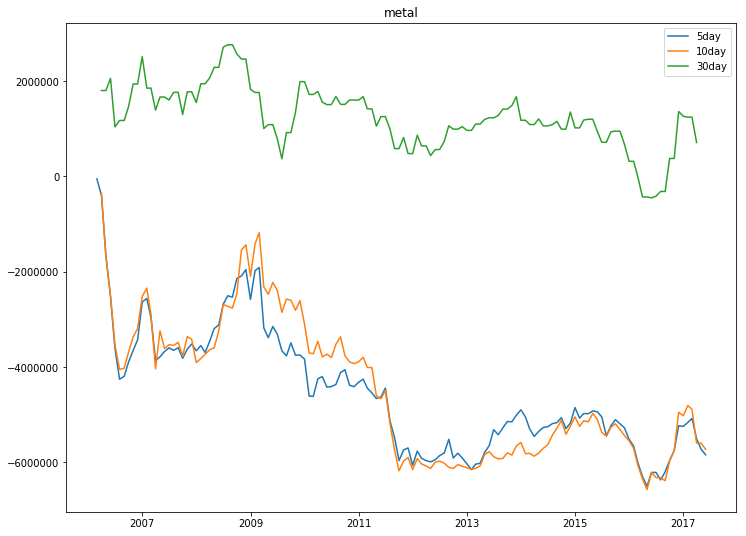

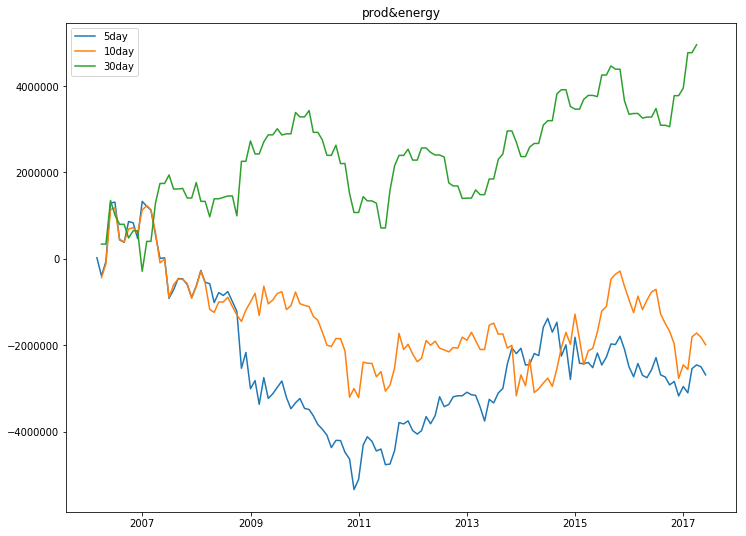

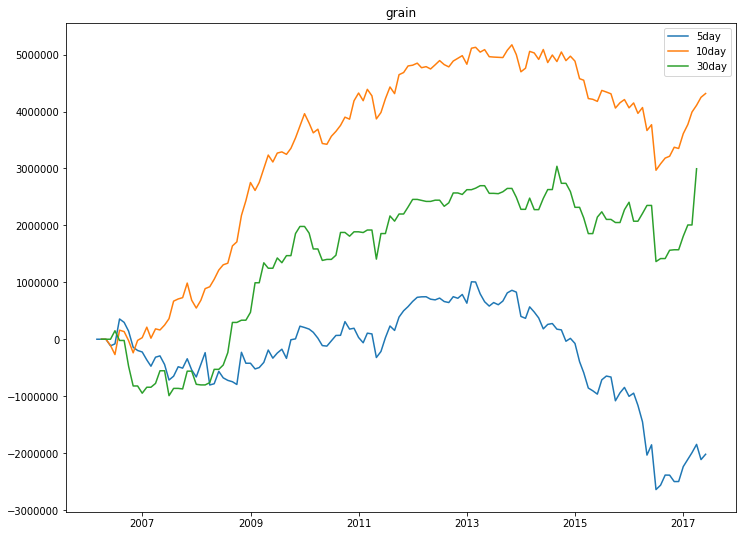

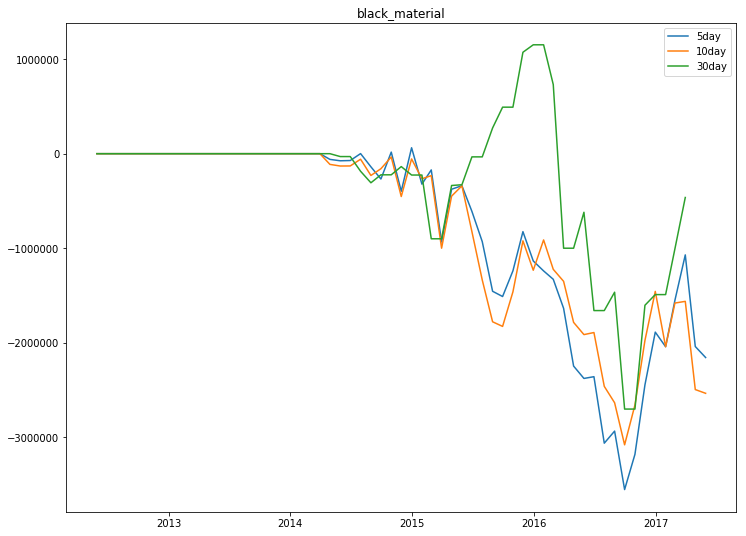

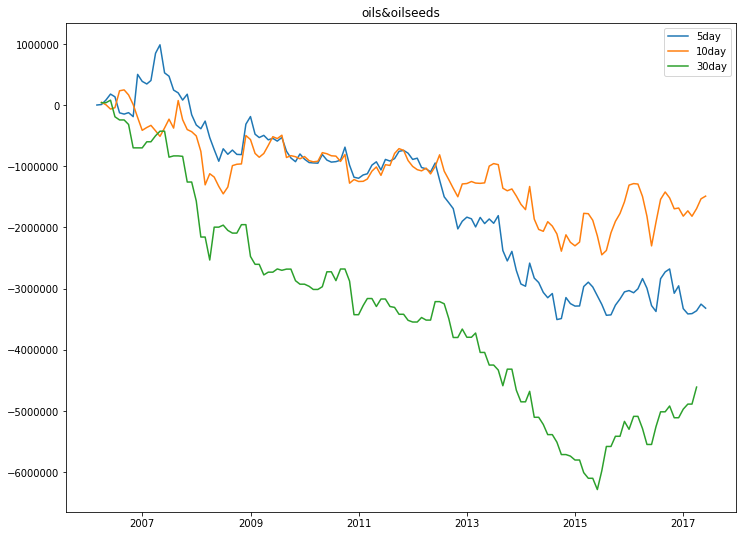

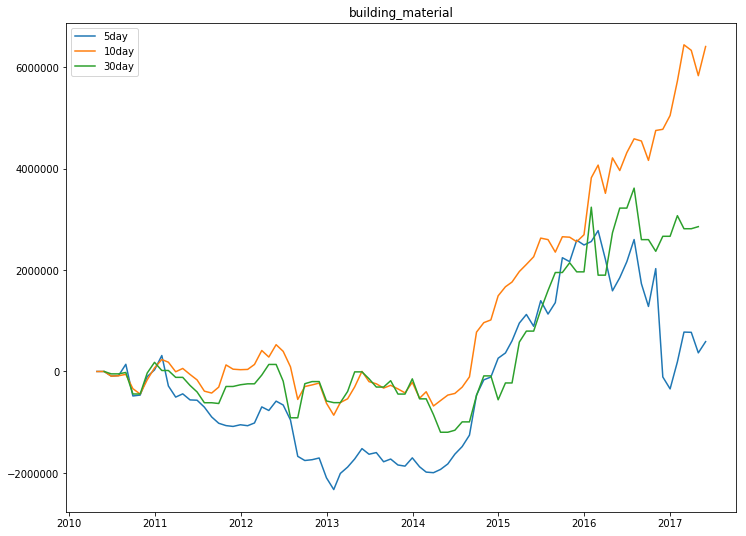

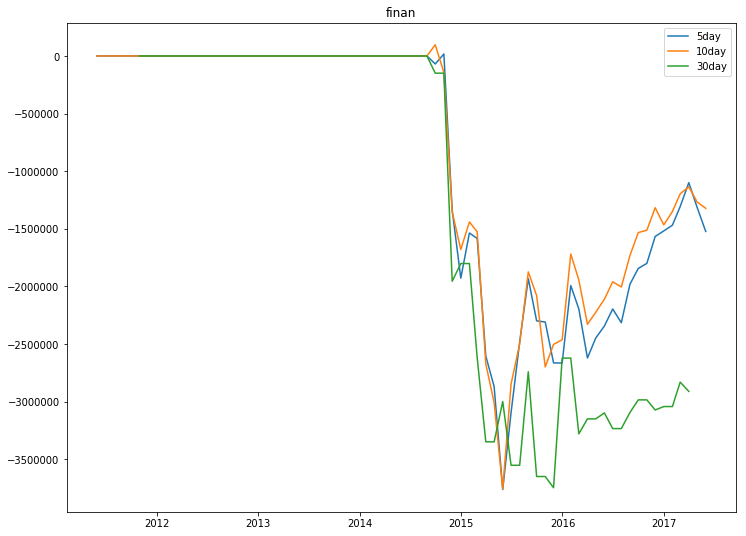

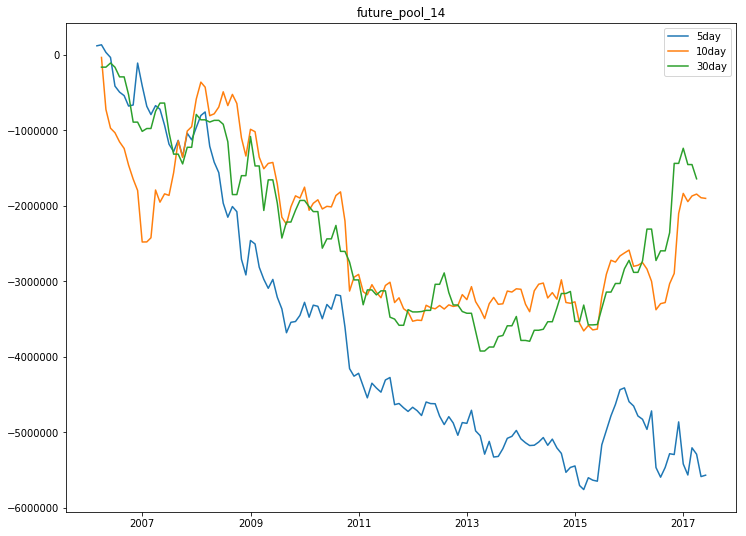

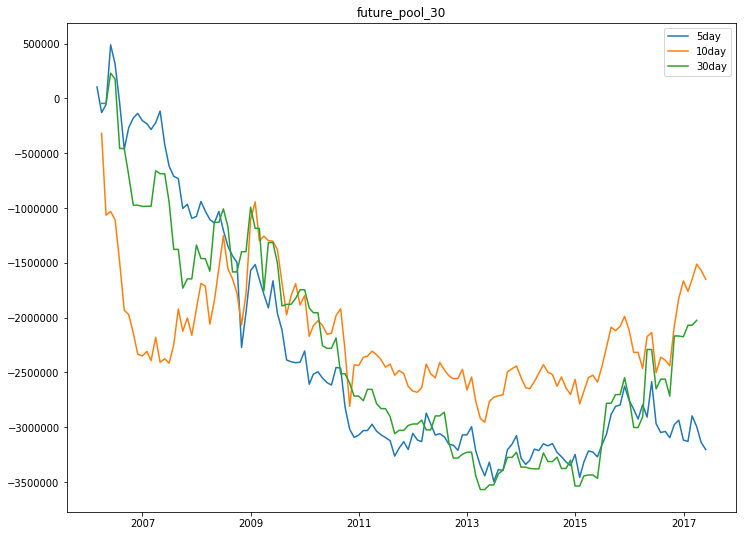

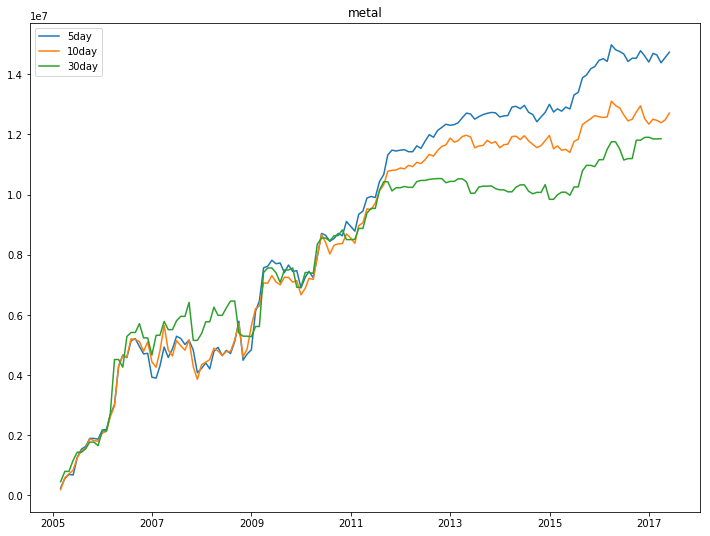

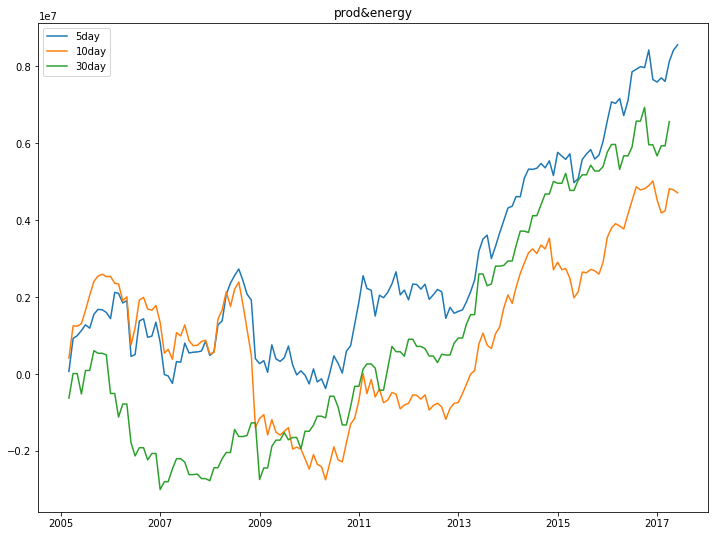

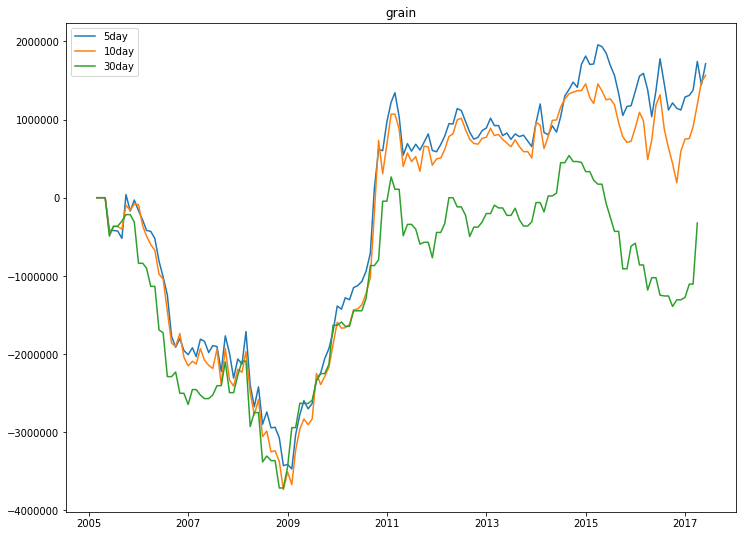

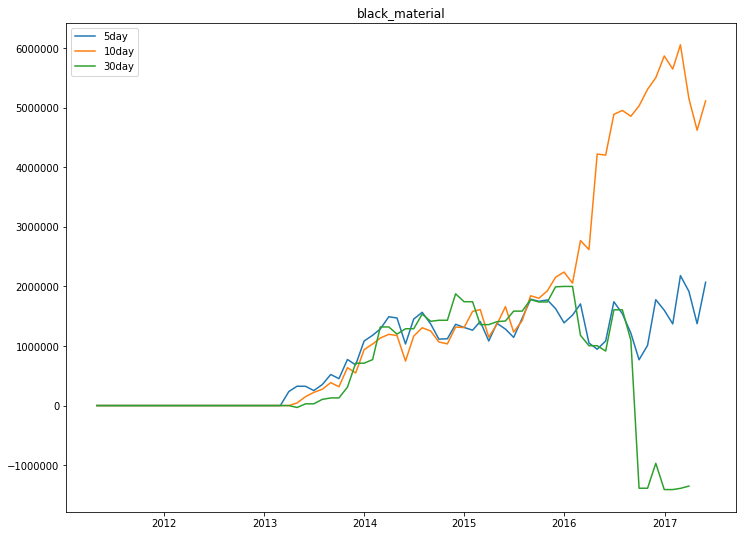

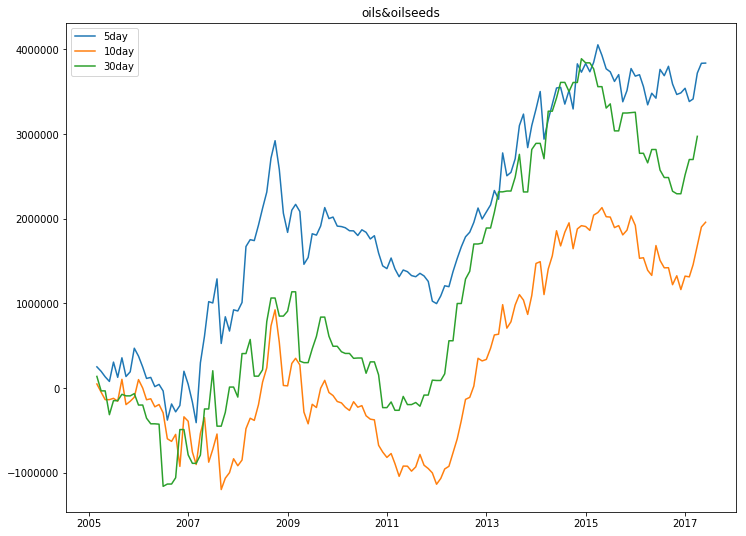

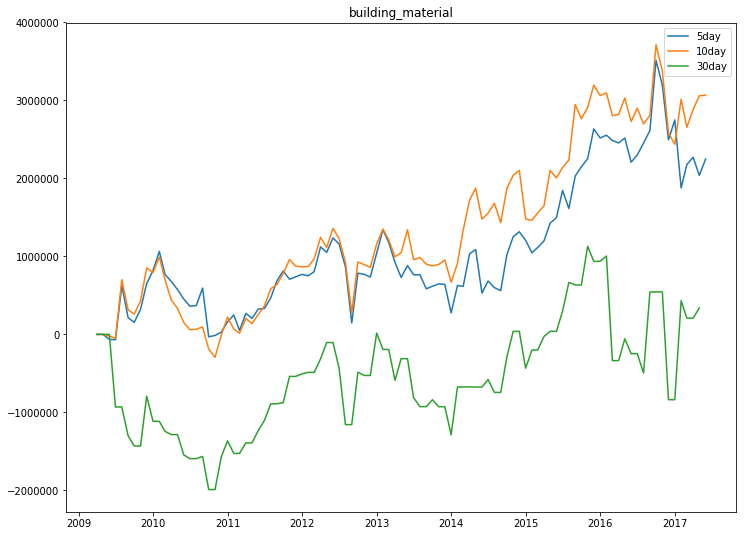

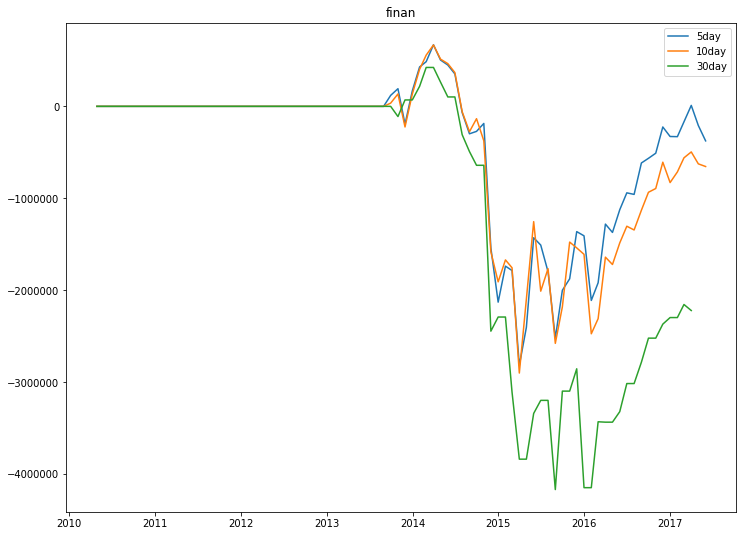

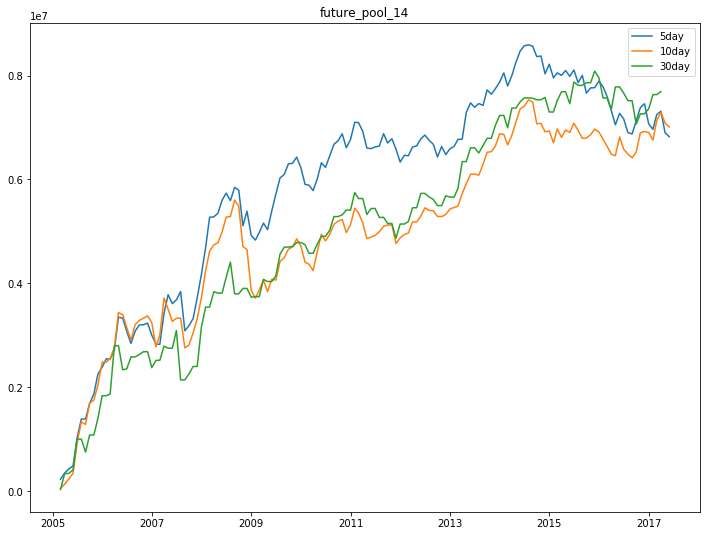

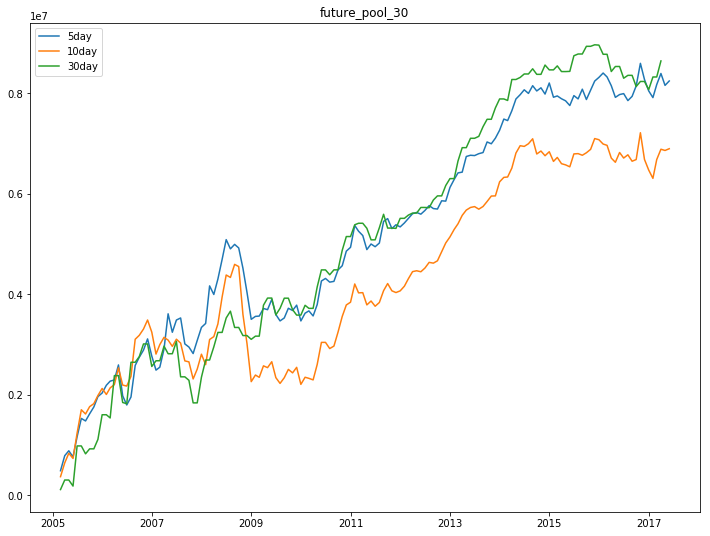

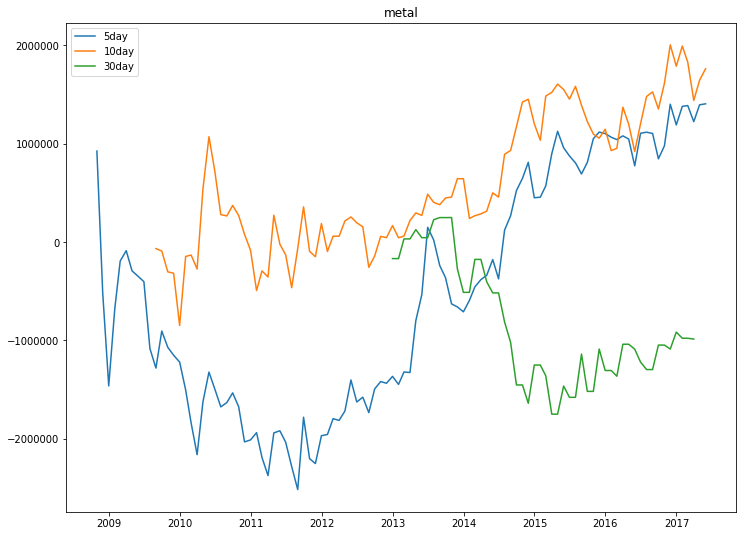

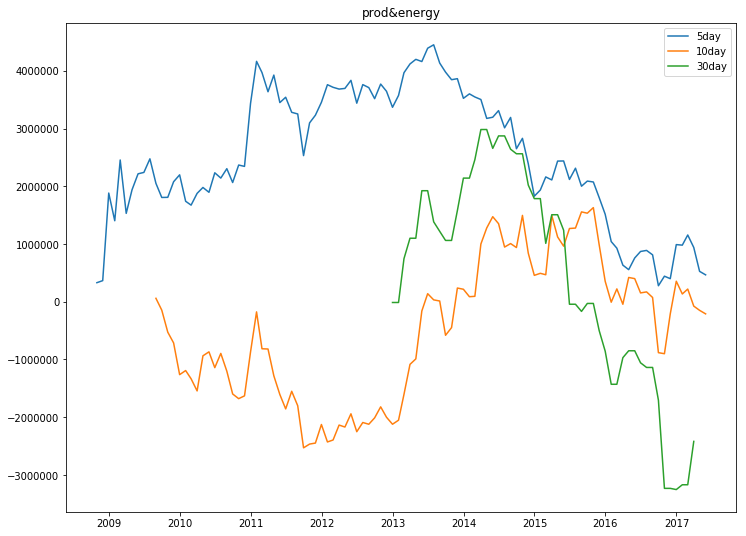

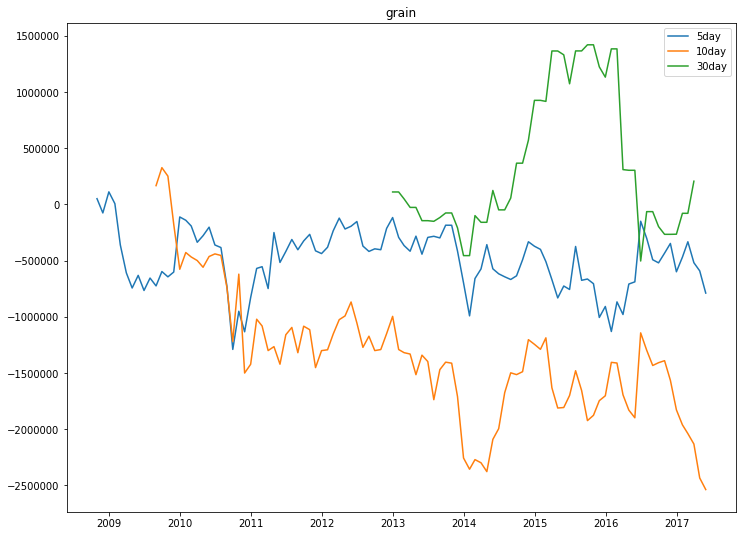

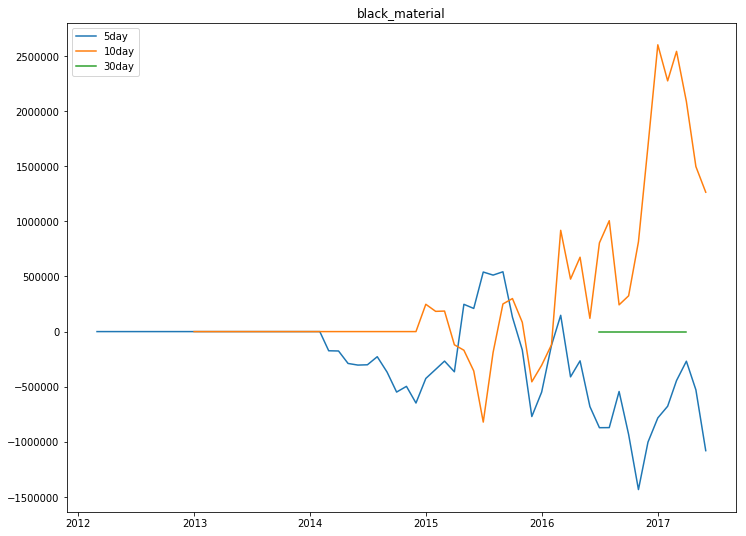

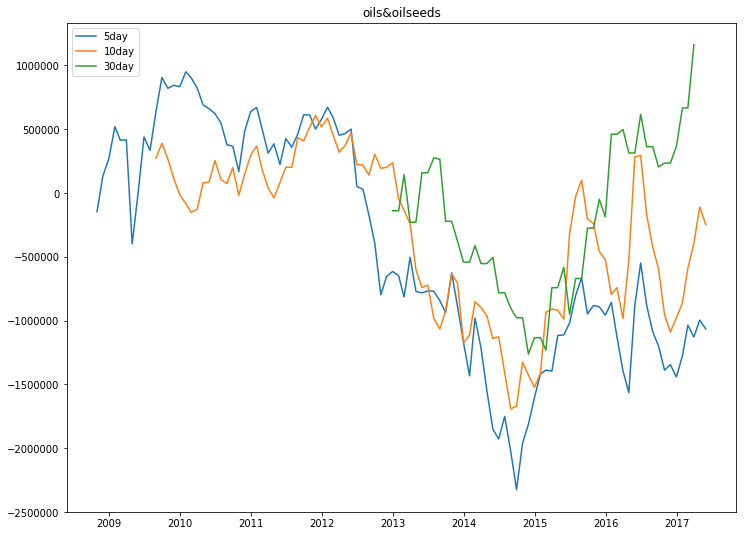

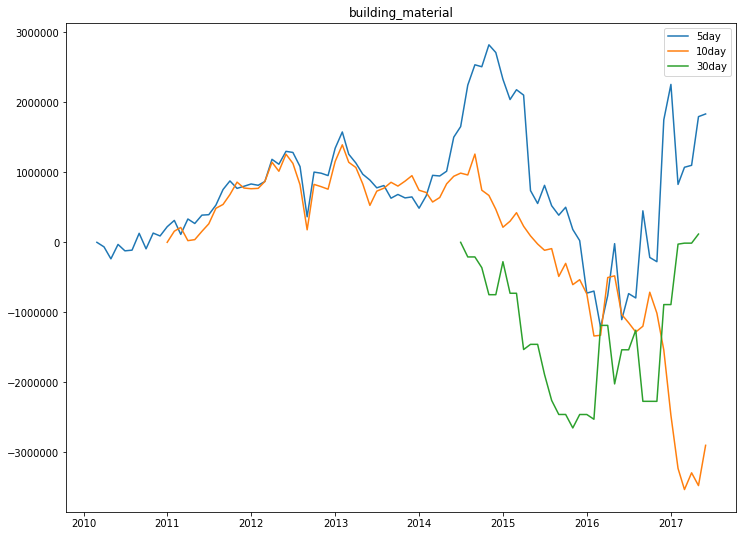

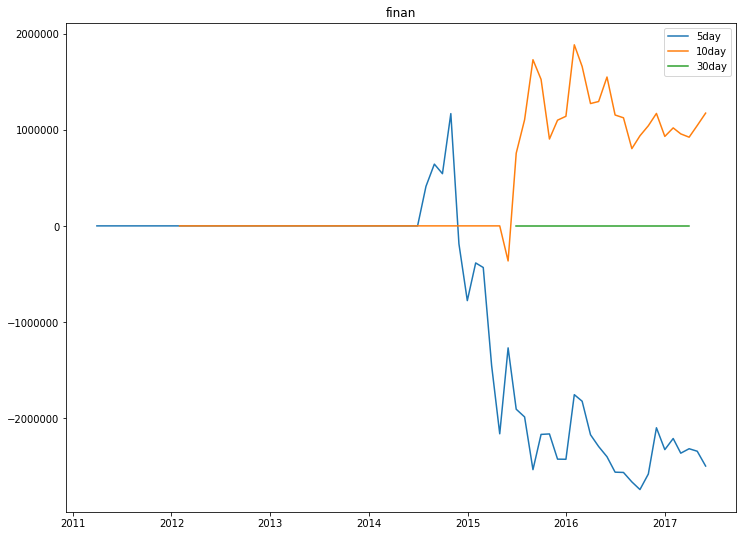

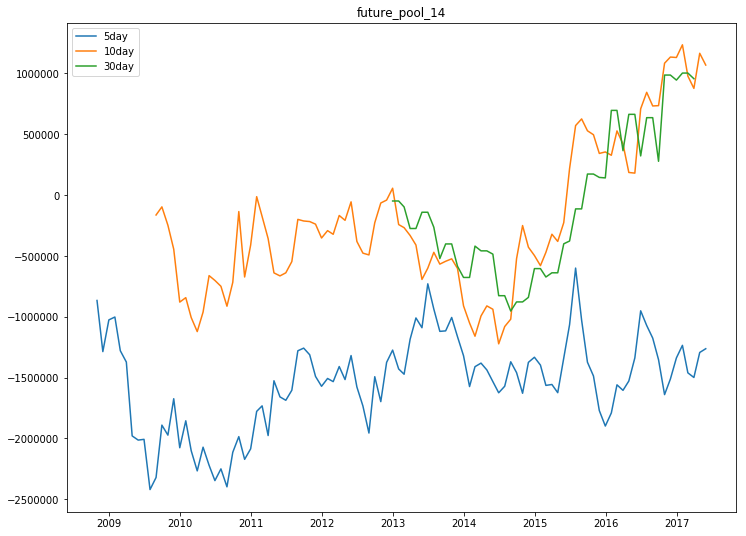

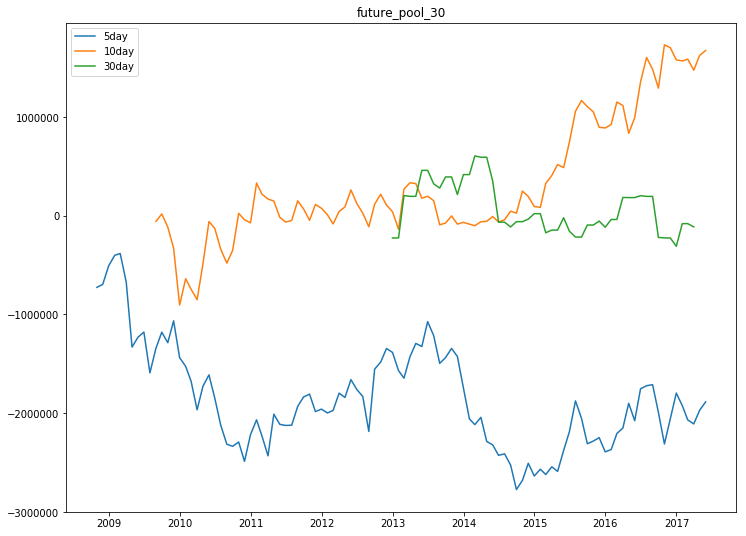

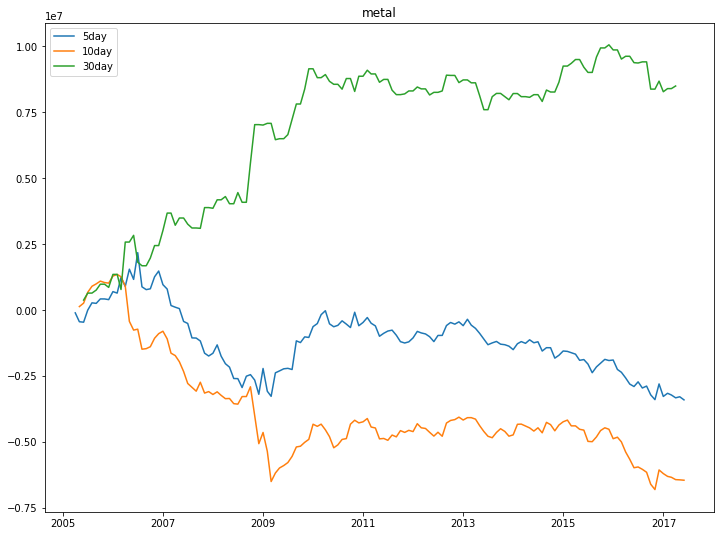

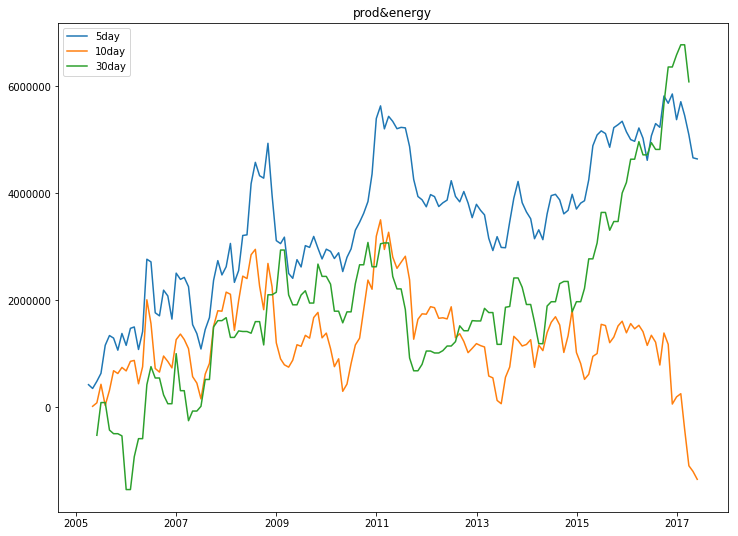

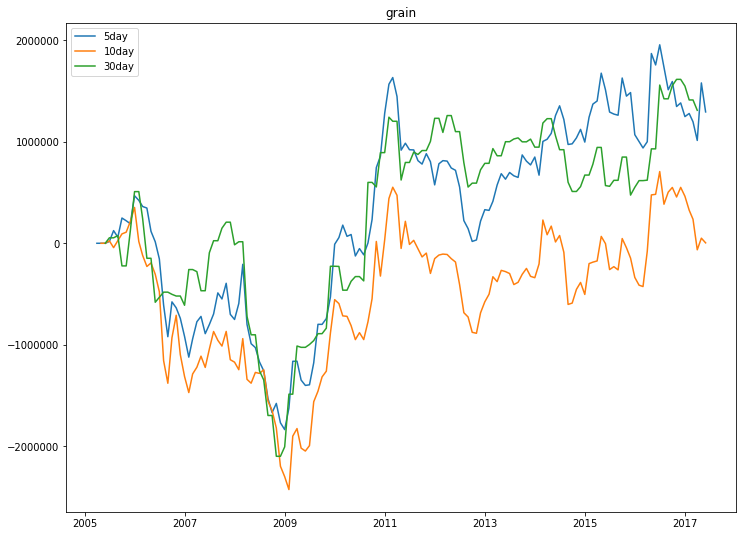

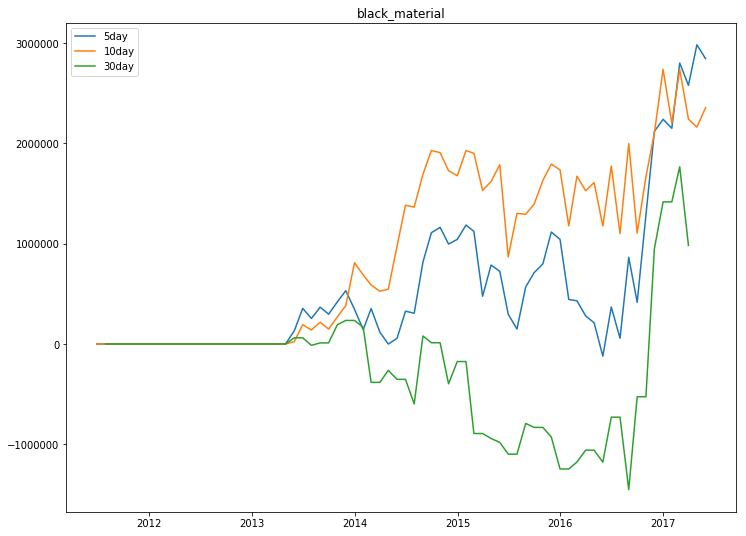

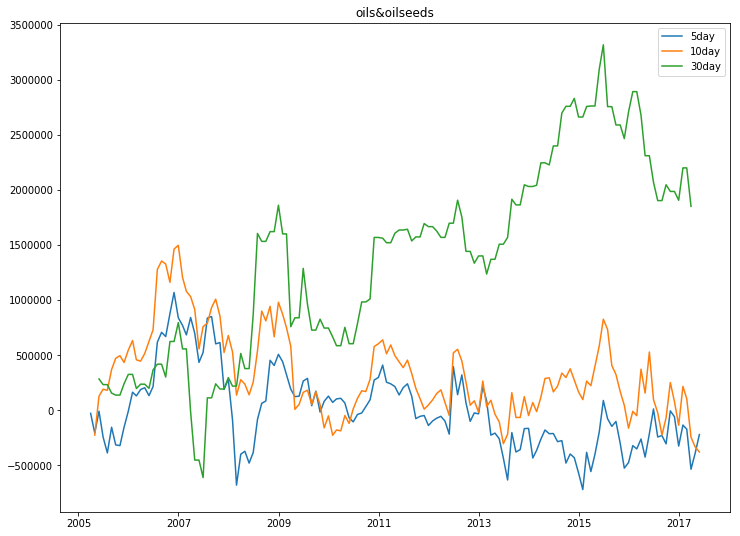

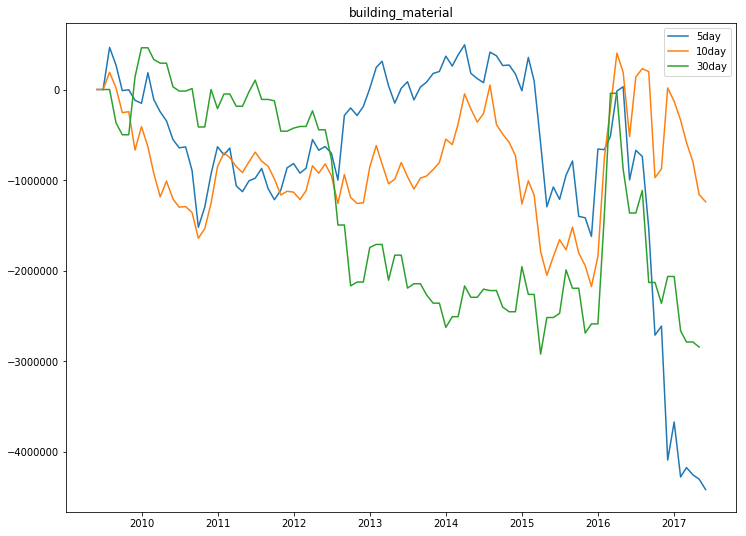

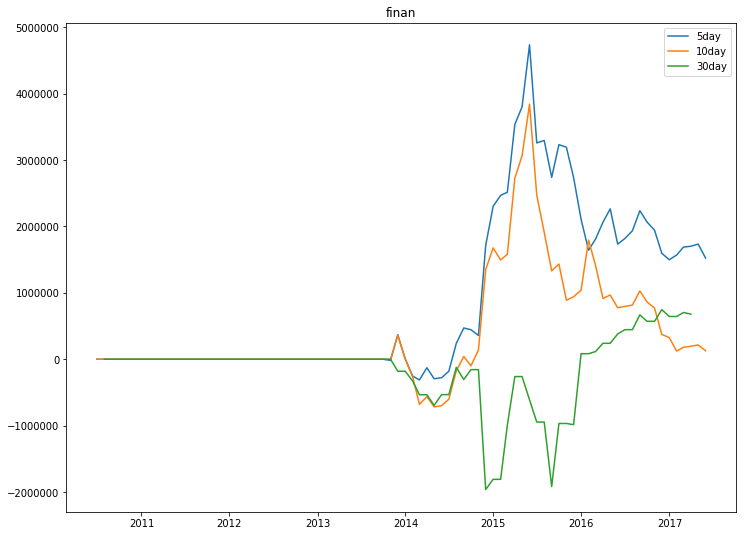

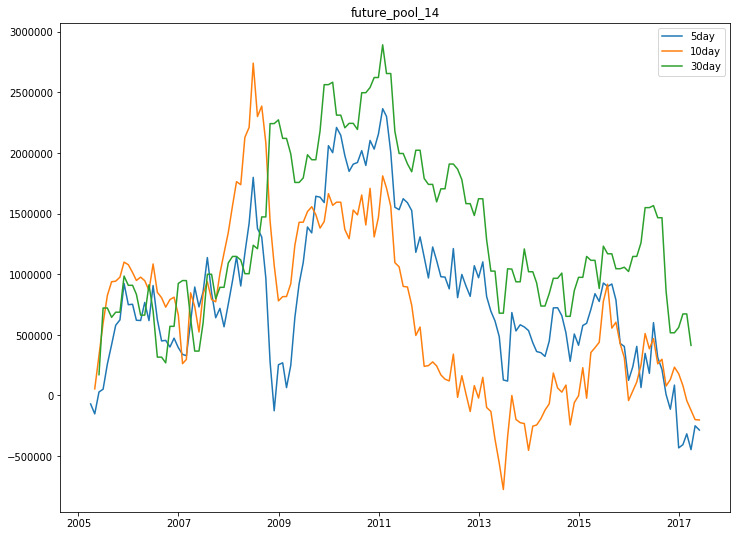

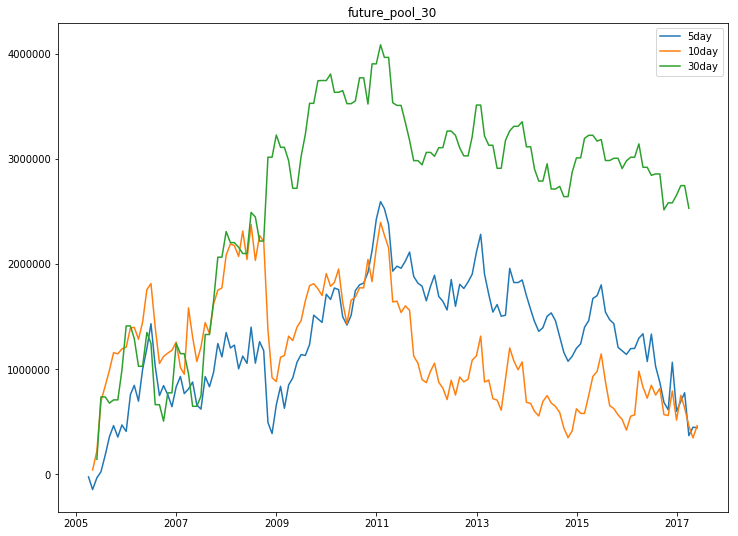

In [18]:
config = configparser.ConfigParser()
for stra in stra_list:
    # save path for the stra
    stra_save_path = res_pic_dir + sep_str +stra
#     if not os.path.exists:
#         print("create stra directory ", stra_save_path)
    os.mkdir(stra_save_path)
    
    res_dic = defaultdict(list)
    print("current stra ", stra, stra_save_path)
    # read the result
    for res_dir in res_dir_list:
        #print(res_dir)
        lable = res_dir.split("-")[-1:]
        stra_res_dir = os.path.join(".."+ sep_str +res_dir+ sep_str + "crosssec", stra)
        if not os.path.exists(stra_res_dir):
            continue
        
        res_file_list = os.listdir(stra_res_dir)
        for res_file in res_file_list:            
            res_f_path = os.path.join(stra_res_dir, res_file)
            pnl_file = os.path.join(res_f_path, "daily_pnl.csv")
            param_file = os.path.join(res_f_path, "param.txt")
            
            config.read(param_file)
            # 不同期货池产业
            future_type = list_to_type(config["params"]["future_pool"])
            res_dic[future_type].append([lable, pnl_file])
        
    for indus, res_list in res_dic.items():
        #stra_indus_save_path = os.path.join(stra_save_path, indus)
        #os.mkdir(stra_indus_save_path)

        fig = plt.figure(figsize=(12, 9))
        ax = plt.subplot(111)

        for res in res_list:
            pnl_file = res[1]
            label = res[0][0]

            df = pd.read_csv(pnl_file)
            df.index = df["date"]
            df.index = df.index.map(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d"))
            freq = "M"

            df = df.groupby(pd.Grouper(freq=freq)).sum()
            df = df.cumsum()
            ax.plot(df, label=label)
        plt.title(indus)
        plt.legend()
        #plt.show()
        plt.savefig(os.path.join(stra_save_path, indus+".png"))

            